In [1]:
# torch imports
import torch
import torch._dynamo
torch._dynamo.config.suppress_errors = True
# Misc imports
import os 
import sys
import seaborn as sns
from pathlib import Path
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSegDev')
# Ionpy imports
from ionpy.util import Config
from ionpy.analysis import ResultsLoader

# Define some useful paths.
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
       '/storage'
))
# Set some defaults
rs = ResultsLoader()
sns.set_style("darkgrid")
torch.set_printoptions(linewidth=200)

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
%%yaml default_cfg 

experiment:
    exp_root: '?'
    inference_seed: 40

inference_data:
    split: '?'

log:
    root: '?'
    save_preds: False 
    log_interval: 10 
    log_pixel_stats: False 
    gether_inference_stats: True
    compute_global_metrics: False 

dataloader:
    batch_size: '?' 
    num_workers: '?' 
    pin_memory: True 

<IPython.core.display.Javascript object>

In [3]:
%%yaml calibration_cfg 

local_calibration:
    num_prob_bins: 15
    neighborhood_width: 3

global_calibration:
    num_classes: 1 
    num_prob_bins: 15
    neighborhood_width: 3

<IPython.core.display.Javascript object>

In [4]:
%%yaml model_cfg 

# For standard datasets
#####################################
model:
    pred_label: 0     
    _type: "standard"
    pretrained_exp_root : None
    checkpoint: 'min-val-abs_area_estimation_error'

<IPython.core.display.Javascript object>

## Gather Inference Options.

In [5]:
%%yaml experiment_cfg 

## Set the high level name
# group: "10_29_24_OCTA_FULLRES_Updated_Benchmark"
# group: "10_26_24_ISLES_Benchmark"
group: "10_28_24_WMH_AllHospitals_Benchmark"

subgroup: "Base"
# subgroup: "Sweep_Threshold"
# subgroup: "Sweep_Temperature"
# subgroup: "Optimal_RAVE_Threshold"
# subgroup: "Optimal_RAVE_Temperature"

# Change this for debugging
# dataloader:
#     batch_size: 1

<IPython.core.display.Javascript object>

In [6]:
# Local imports
from ese.analysis.analysis_utils.submit_utils import get_ese_inference_configs

# Get the configs for the different runs.
base_cfg = Config(default_cfg).update([calibration_cfg, model_cfg])

# For inference experiments, we don't add the date by default.
add_date = False 
# Get the different experiment cfg yamls.
updated_base_cfg, inf_cfgs = get_ese_inference_configs(
    exp_cfg=experiment_cfg, 
    base_cfg=base_cfg,
    add_date=add_date
)

/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_dir" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [7]:
len(inf_cfgs)

2

In [8]:
### Get the first half of the inference configs.
# inf_cfgs = inf_cfgs[:len(inf_cfgs)//2]
# inf_cfgs = inf_cfgs[len(inf_cfgs)//2:]
# print(len(inf_cfgs))

## Running Jobs

In [9]:
from ese.analysis.run_inference import get_cal_stats

Set seed: 40


/storage/vbutoi/projects/ionpy/util/libcheck.py:49: UserWarning: Intel MKL extensions not available for NumPy
  warn("Intel MKL extensions not available for NumPy")
/storage/vbutoi/projects/ionpy/util/libcheck.py:57: UserWarning: Using slow Pillow instead of Pillow-SIMD
  warn("Using slow Pillow instead of Pillow-SIMD")


Loading checkpoint: min-val-abs_area_estimation_error.
[Errno 2] No such file or directory: '/storage/vbutoi/scratch/ESE/training/10_27_24_WMH_AllHospitals_wHeavyAug_fixed/20241027_222955-9ED6-91140e7bcb5c786adea719e1ce831a37/checkpoints/min-val-abs_area_estimation_error.pt'
Defaulting to loading: max-val-dice_score.
Running:

dataloader:
  batch_size: 4
  num_workers: 4
  pin_memory: true
experiment:
  exp_name: 10_28_24_WMH_AllHospitals_Benchmark/Base
  exp_root: /storage/vbutoi/scratch/ESE/inference/10_28_24_WMH_AllHospitals_Benchmark/Base
  inf_kwargs:
    from_logits: true
    temperature: 1.0
    threshold: 0.5
  inference_seed: 40
  model_dir: /storage/vbutoi/scratch/ESE/training/10_27_24_WMH_AllHospitals_wHeavyAug_fixed/20241027_222955-9ED6-91140e7bcb5c786adea719e1ce831a37
  pretrained_seed: 40
global_cal_metrics:
- ECE:
    _fn: ese.metrics.calibration.ece_loss
    cal_type: toplabel
global_calibration:
  neighborhood_width: 3
  num_classes: 1
  num_prob_bins: 15
image_cal_met

W1029 21:36:41.766854 140311704733504 torch/_dynamo/variables/builtin.py:775] [0/0] incorrect arg count <bound method BuiltinVariable.call_enumerate of BuiltinVariable()> got an unexpected keyword argument 'start' and no constant handler


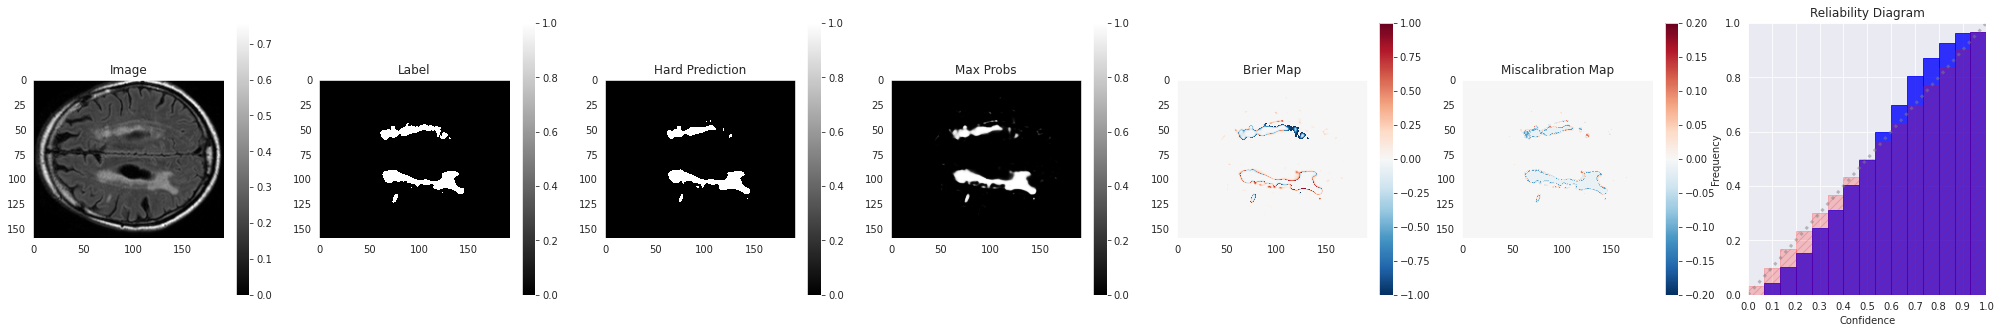

METRICS: 
--------
Dice: 0.8910021185874939
Image_ECE: 0.0009551296719296893

VOLUMES: 
--------
{'gt_volume': 14032.0,
 'hard_proportion': 0.009168158637152778,
 'hard_volume': 13519.0,
 'new_gt_proportion': 0.009516059027777777,
 'soft_proportion': 0.009903219673368666,
 'soft_volume': 14602.8916015625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_46',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



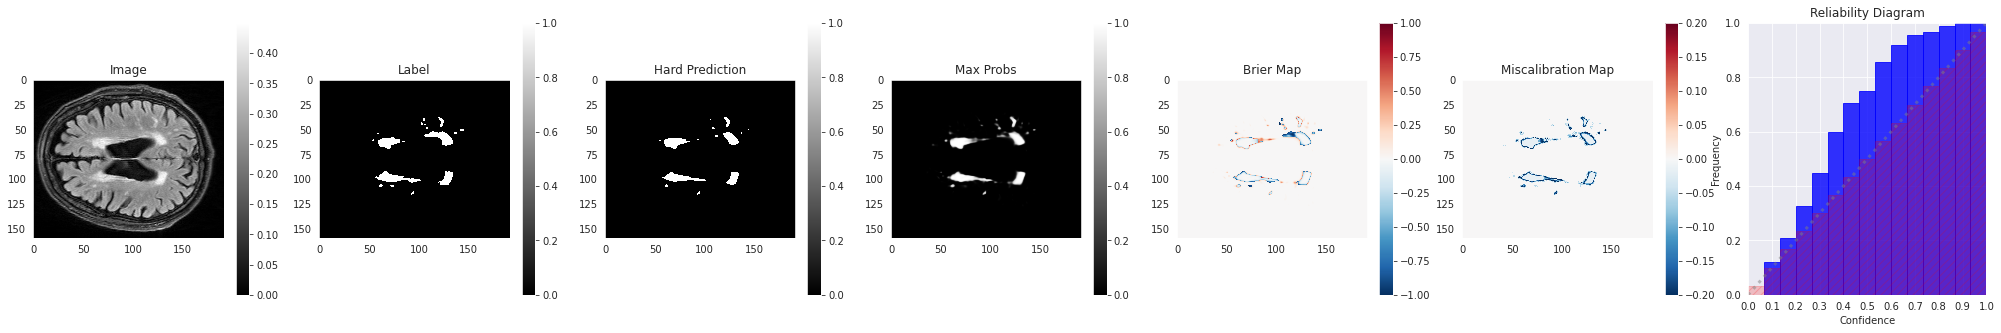

METRICS: 
--------
Dice: 0.8204595446586609
Image_ECE: 0.0011414211583656037

VOLUMES: 
--------
{'gt_volume': 8866.0,
 'hard_proportion': 0.004435221354166667,
 'hard_volume': 6540.0,
 'new_gt_proportion': 0.0060126410590277775,
 'soft_proportion': 0.004871220058865018,
 'soft_volume': 7182.90625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_51',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



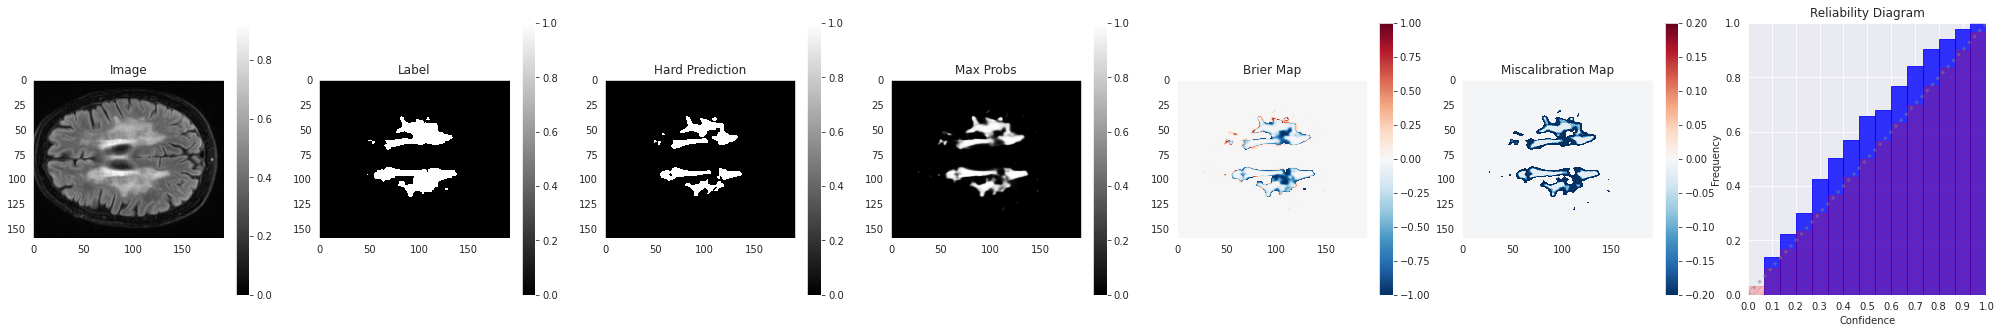

METRICS: 
--------
Dice: 0.833254337310791
Image_ECE: 0.0015703406654751055

VOLUMES: 
--------
{'gt_volume': 17240.0,
 'hard_proportion': 0.009778510199652778,
 'hard_volume': 14419.0,
 'new_gt_proportion': 0.011691623263888888,
 'soft_proportion': 0.010121283266279433,
 'soft_volume': 14924.439453125}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_135',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



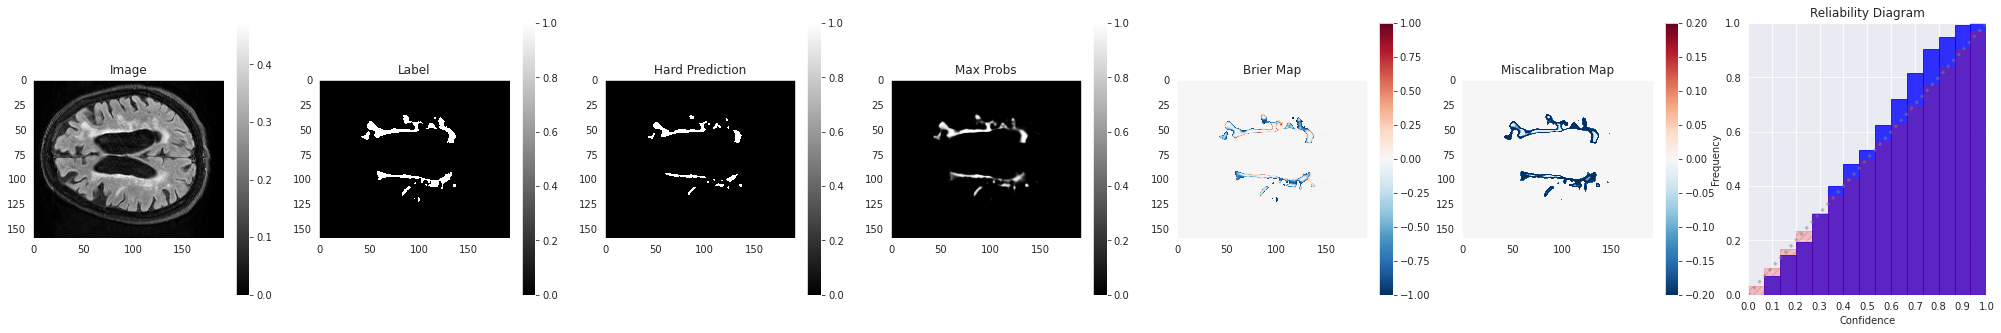

METRICS: 
--------
Dice: 0.835616409778595
Image_ECE: 0.0006263669285513695

VOLUMES: 
--------
{'gt_volume': 9640.0,
 'hard_proportion': 0.0057400173611111115,
 'hard_volume': 8464.0,
 'new_gt_proportion': 0.006537543402777778,
 'soft_proportion': 0.0062282515896691214,
 'soft_volume': 9183.9306640625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_94',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



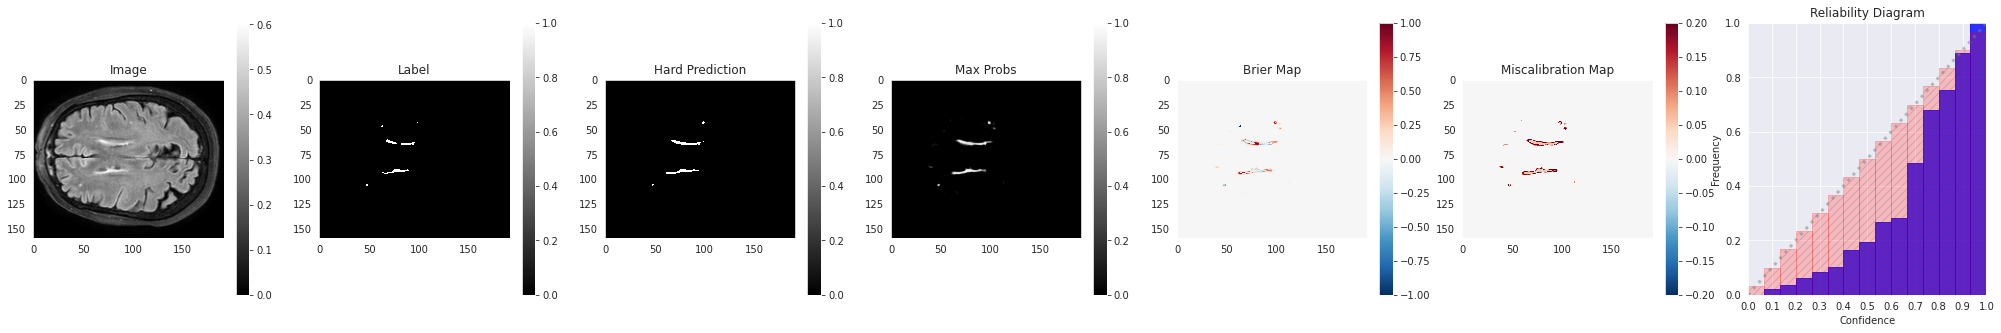

METRICS: 
--------
Dice: 0.6174200773239136
Image_ECE: 0.0003424989978233031

VOLUMES: 
--------
{'gt_volume': 408.0,
 'hard_proportion': 0.0003384060329861111,
 'hard_volume': 499.0,
 'new_gt_proportion': 0.0002766927083333333,
 'soft_proportion': 0.0006179559148020215,
 'soft_volume': 911.2130737304688}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_163',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



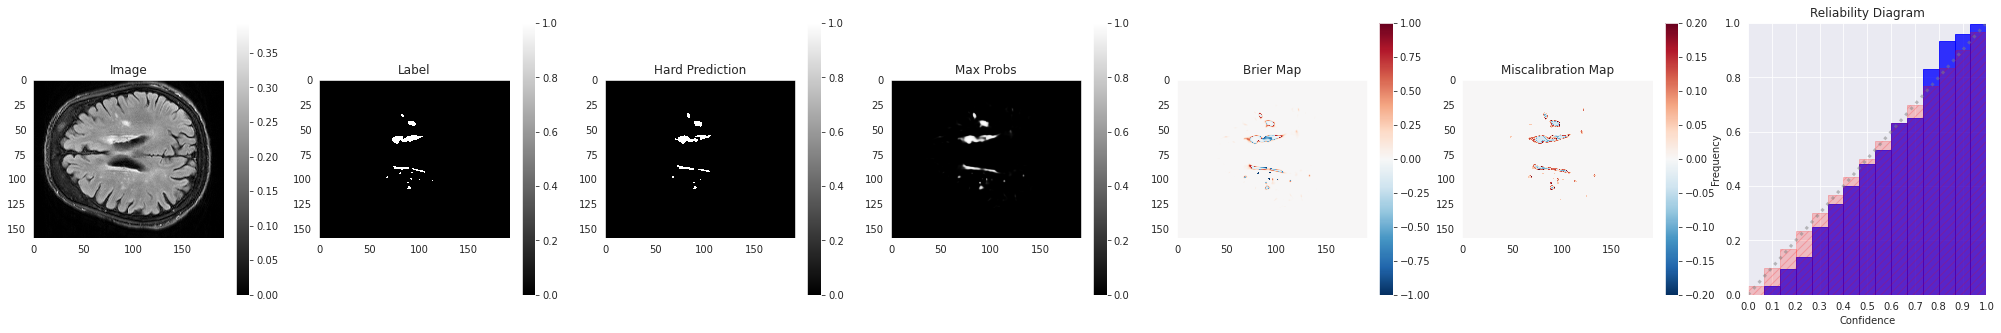

METRICS: 
--------
Dice: 0.774678111076355
Image_ECE: 0.00016339772934172638

VOLUMES: 
--------
{'gt_volume': 1486.0,
 'hard_proportion': 0.0008884006076388889,
 'hard_volume': 1310.0,
 'new_gt_proportion': 0.0010077582465277779,
 'soft_proportion': 0.0011118177738454608,
 'soft_volume': 1639.4420166015625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_98',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



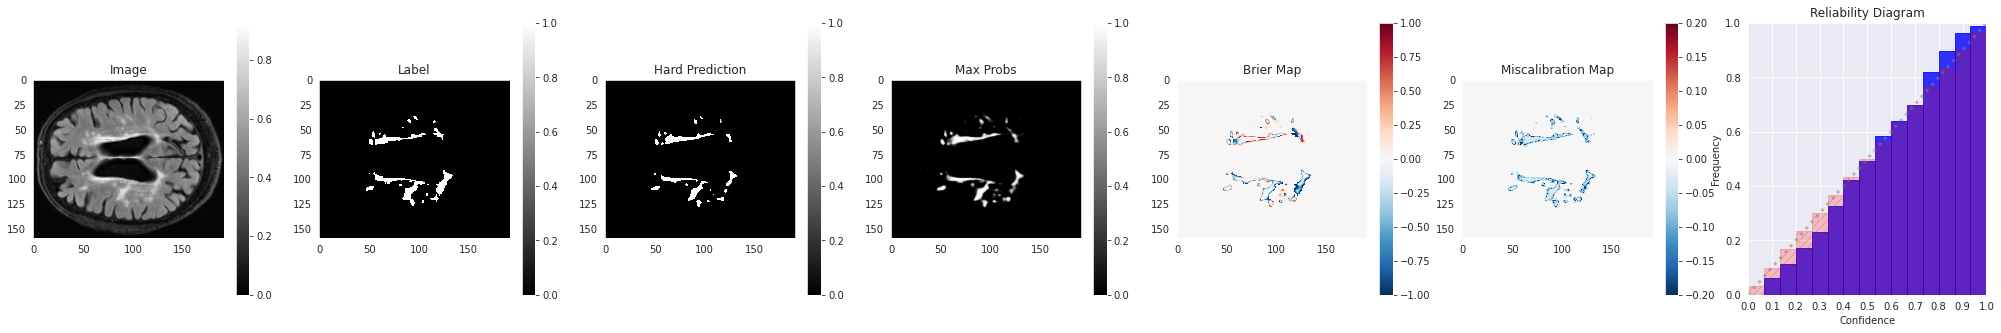

METRICS: 
--------
Dice: 0.8194119930267334
Image_ECE: 0.0003959991603502293

VOLUMES: 
--------
{'gt_volume': 7283.0,
 'hard_proportion': 0.004633246527777778,
 'hard_volume': 6832.0,
 'new_gt_proportion': 0.004939100477430555,
 'soft_proportion': 0.005065699749522739,
 'soft_volume': 7469.67822265625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_111',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



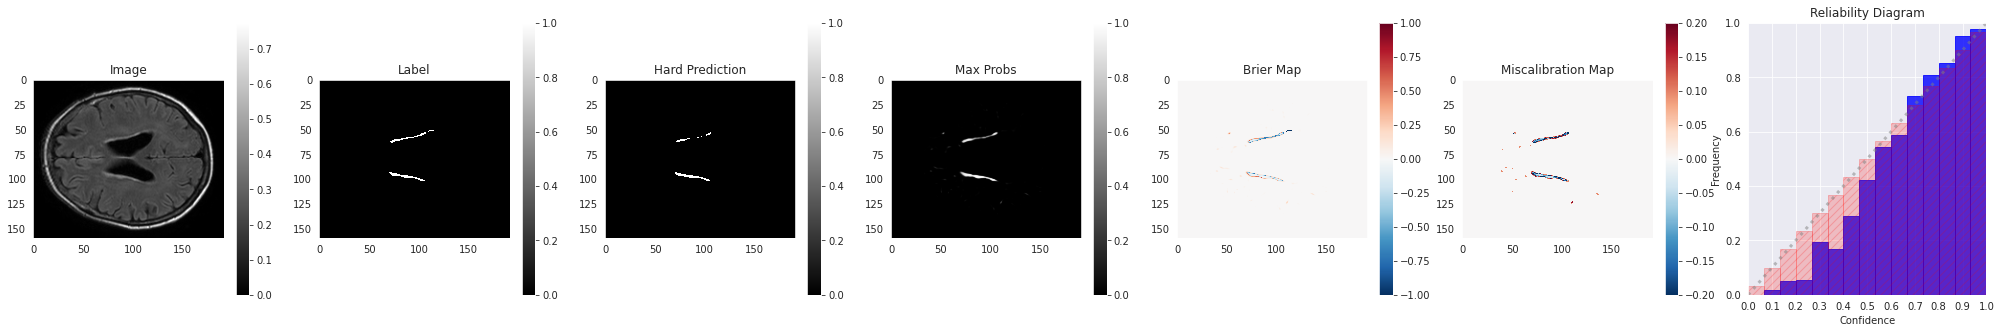

METRICS: 
--------
Dice: 0.7417789697647095
Image_ECE: 0.0002724638899377138

VOLUMES: 
--------
{'gt_volume': 981.0,
 'hard_proportion': 0.0005927191840277777,
 'hard_volume': 874.0,
 'new_gt_proportion': 0.000665283203125,
 'soft_proportion': 0.0009125501745276981,
 'soft_volume': 1345.6099853515625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_35',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



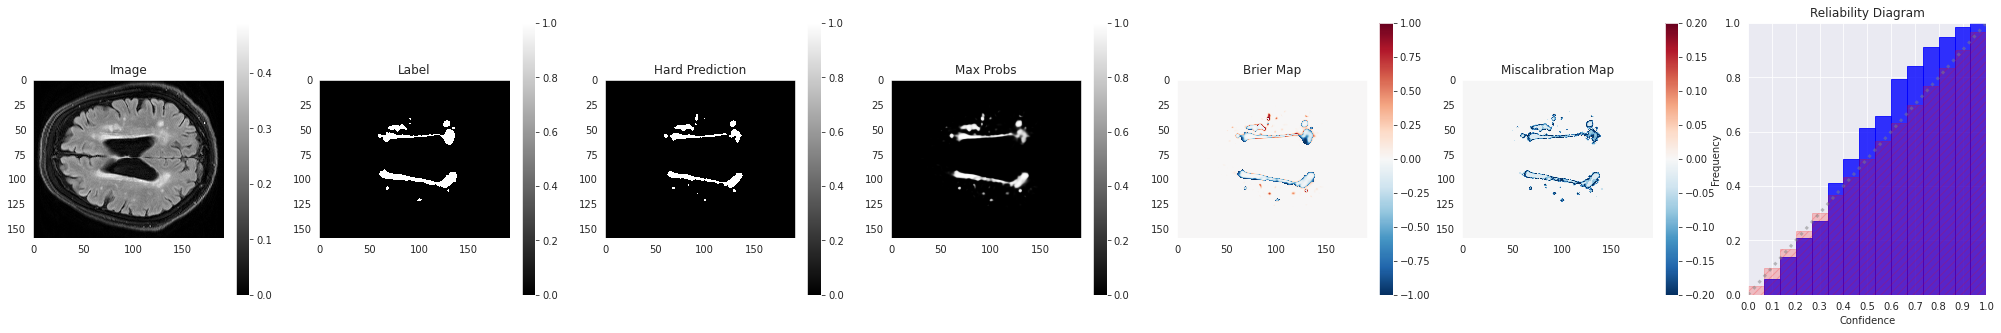

METRICS: 
--------
Dice: 0.8378859758377075
Image_ECE: 0.0005121961094662272

VOLUMES: 
--------
{'gt_volume': 5462.0,
 'hard_proportion': 0.0031480577256944443,
 'hard_volume': 4642.0,
 'new_gt_proportion': 0.0037041558159722223,
 'soft_proportion': 0.0035966780450608993,
 'soft_volume': 5303.517578125}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_56',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



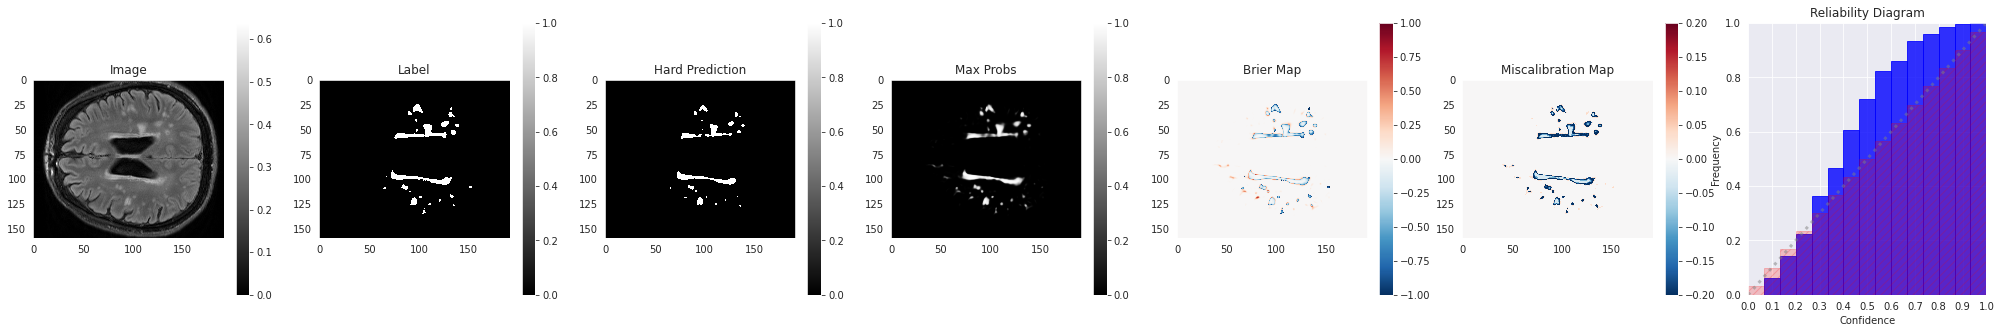

METRICS: 
--------
Dice: 0.8200641870498657
Image_ECE: 0.0009845953092045292

VOLUMES: 
--------
{'gt_volume': 7762.0,
 'hard_proportion': 0.004037814670138889,
 'hard_volume': 5954.0,
 'new_gt_proportion': 0.005263943142361111,
 'soft_proportion': 0.004738017585542467,
 'soft_volume': 6986.4912109375}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_84',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



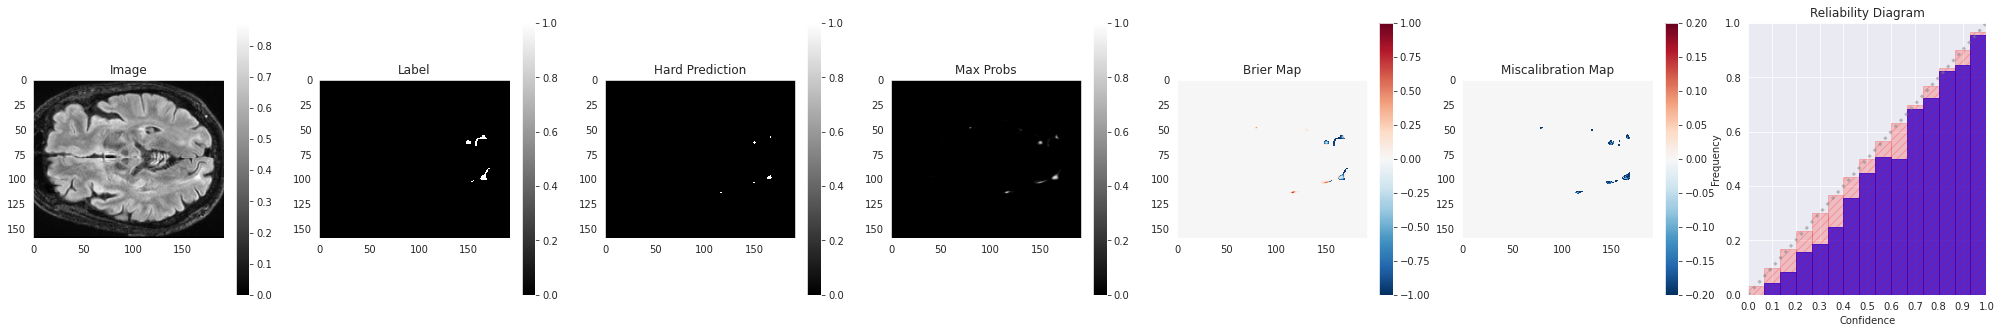

METRICS: 
--------
Dice: 0.5670840740203857
Image_ECE: 0.00016431005996079043

VOLUMES: 
--------
{'gt_volume': 673.0,
 'hard_proportion': 0.0003017849392361111,
 'hard_volume': 445.0,
 'new_gt_proportion': 0.00045640733506944445,
 'soft_proportion': 0.0006207173897160424,
 'soft_volume': 915.2850341796875}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_141',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



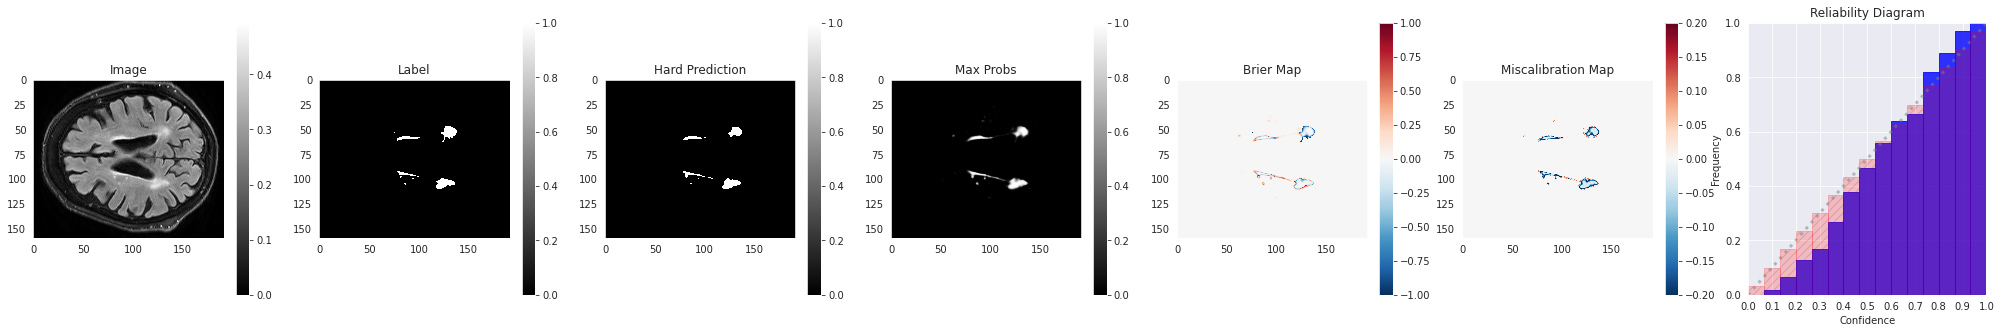

METRICS: 
--------
Dice: 0.8028674125671387
Image_ECE: 0.0004639934971540804

VOLUMES: 
--------
{'gt_volume': 2540.0,
 'hard_proportion': 0.0016832139756944445,
 'hard_volume': 2482.0,
 'new_gt_proportion': 0.0017225477430555555,
 'soft_proportion': 0.0020844386683570013,
 'soft_volume': 3073.6298828125}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_79',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



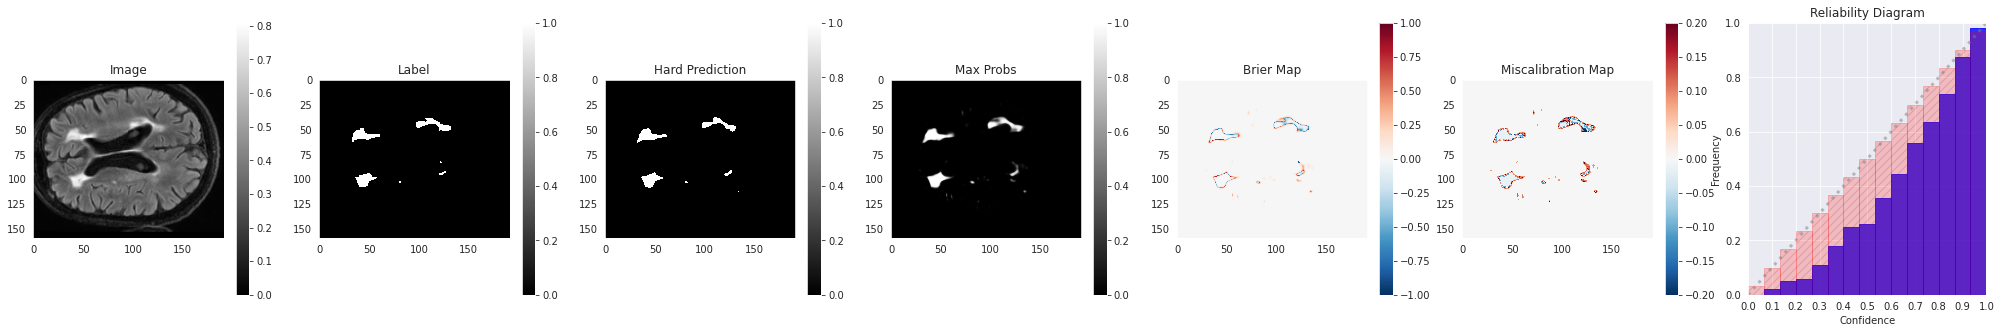

METRICS: 
--------
Dice: 0.8189278244972229
Image_ECE: 0.0009088012458048171

VOLUMES: 
--------
{'gt_volume': 4315.0,
 'hard_proportion': 0.0034369574652777777,
 'hard_volume': 5068.0,
 'new_gt_proportion': 0.002926296657986111,
 'soft_proportion': 0.003829090462790595,
 'soft_volume': 5646.2236328125}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_148',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



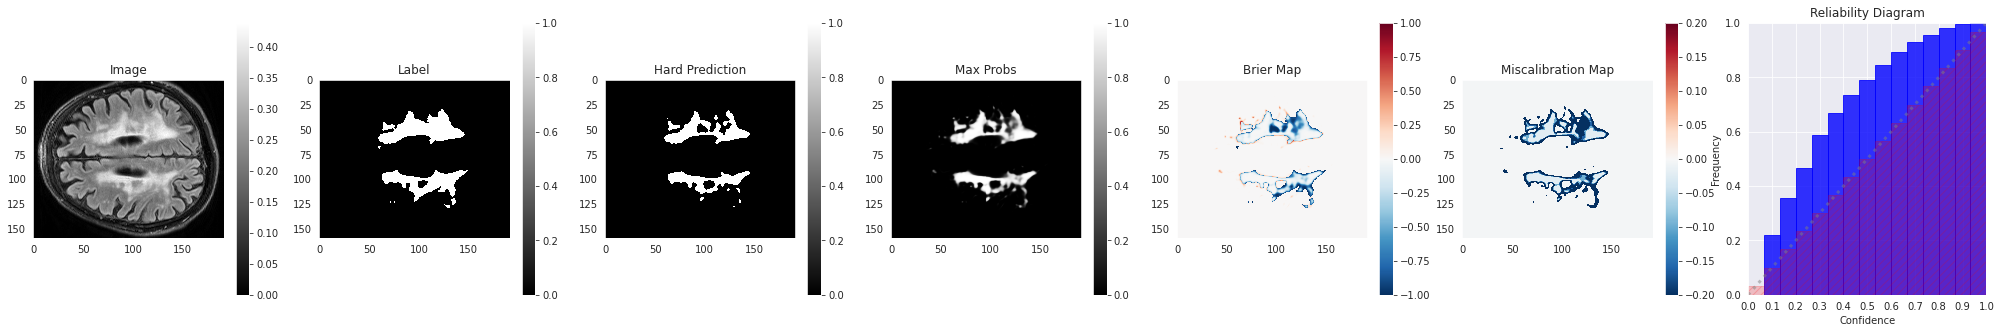

METRICS: 
--------
Dice: 0.8274937272071838
Image_ECE: 0.004147224580749601

VOLUMES: 
--------
{'gt_volume': 26837.0,
 'hard_proportion': 0.013658989800347222,
 'hard_volume': 20141.0,
 'new_gt_proportion': 0.01820000542534722,
 'soft_proportion': 0.014052780469258626,
 'soft_volume': 20721.66796875}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_72',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



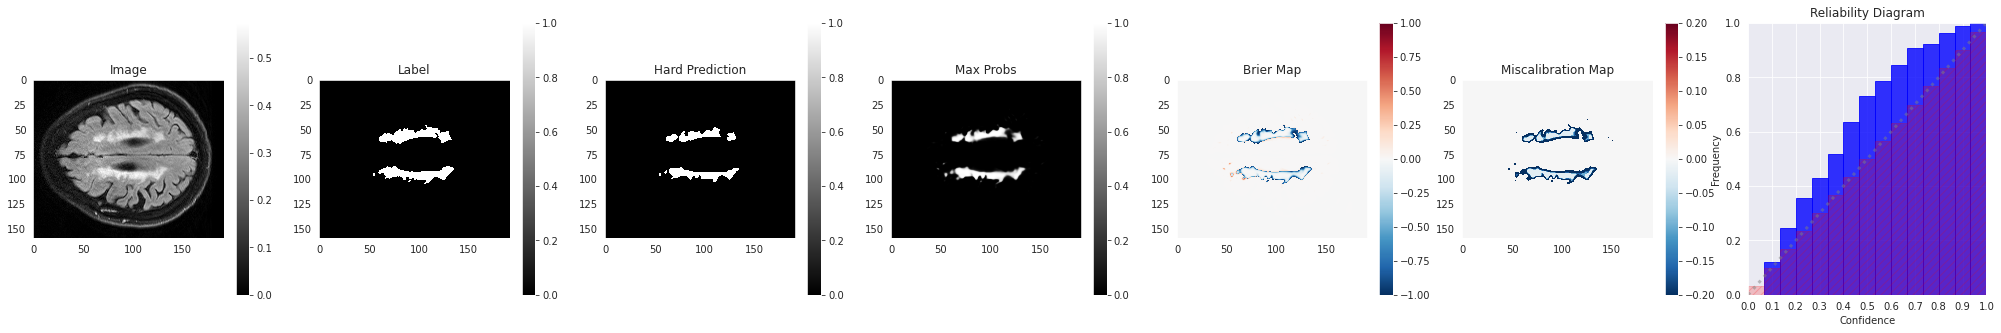

METRICS: 
--------
Dice: 0.8478542566299438
Image_ECE: 0.0011939695266298693

VOLUMES: 
--------
{'gt_volume': 11963.0,
 'hard_proportion': 0.006551784939236111,
 'hard_volume': 9661.0,
 'new_gt_proportion': 0.008112928602430555,
 'soft_proportion': 0.006984749105241564,
 'soft_volume': 10299.431640625}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_63',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



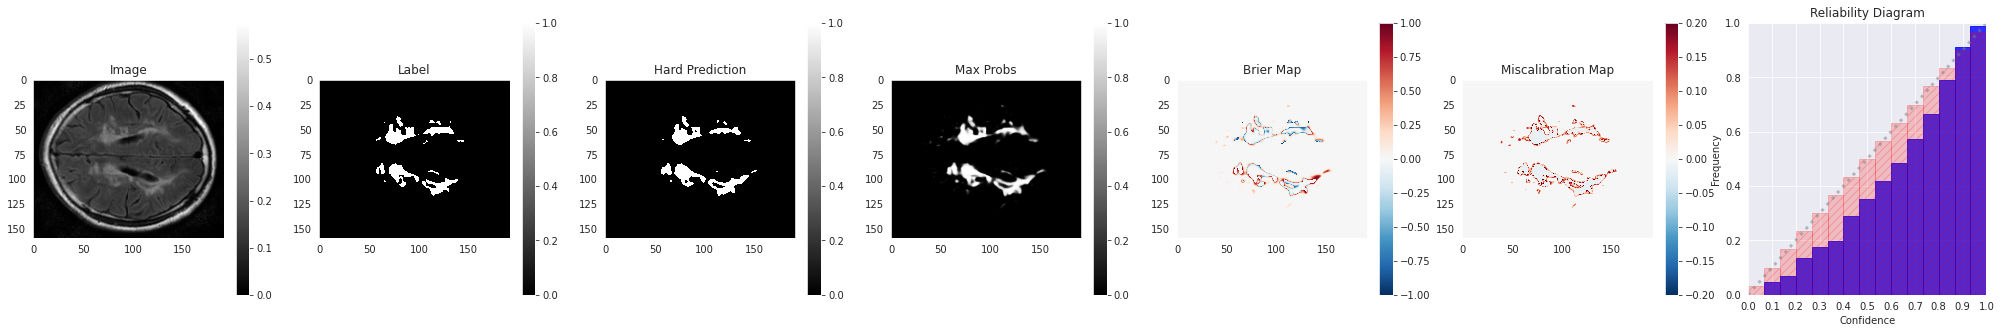

METRICS: 
--------
Dice: 0.8210321664810181
Image_ECE: 0.001382014902221841

VOLUMES: 
--------
{'gt_volume': 10548.0,
 'hard_proportion': 0.0075113932291666664,
 'hard_volume': 11076.0,
 'new_gt_proportion': 0.0071533203125,
 'soft_proportion': 0.00845162139998542,
 'soft_volume': 12462.4228515625}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_4',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



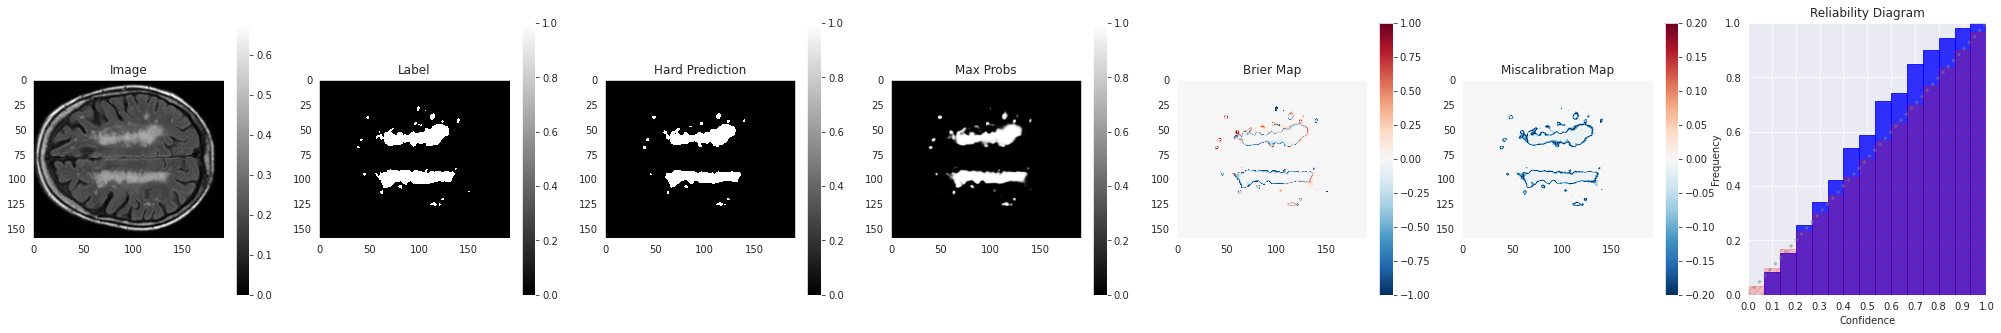

METRICS: 
--------
Dice: 0.8996439576148987
Image_ECE: 0.0008320480453902948

VOLUMES: 
--------
{'gt_volume': 15617.0,
 'hard_proportion': 0.009600830078125,
 'hard_volume': 14157.0,
 'new_gt_proportion': 0.010590955946180555,
 'soft_proportion': 0.010085425111982557,
 'soft_volume': 14871.564453125}

METADATA: 
---------
{'batch_idx': 4,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_39',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



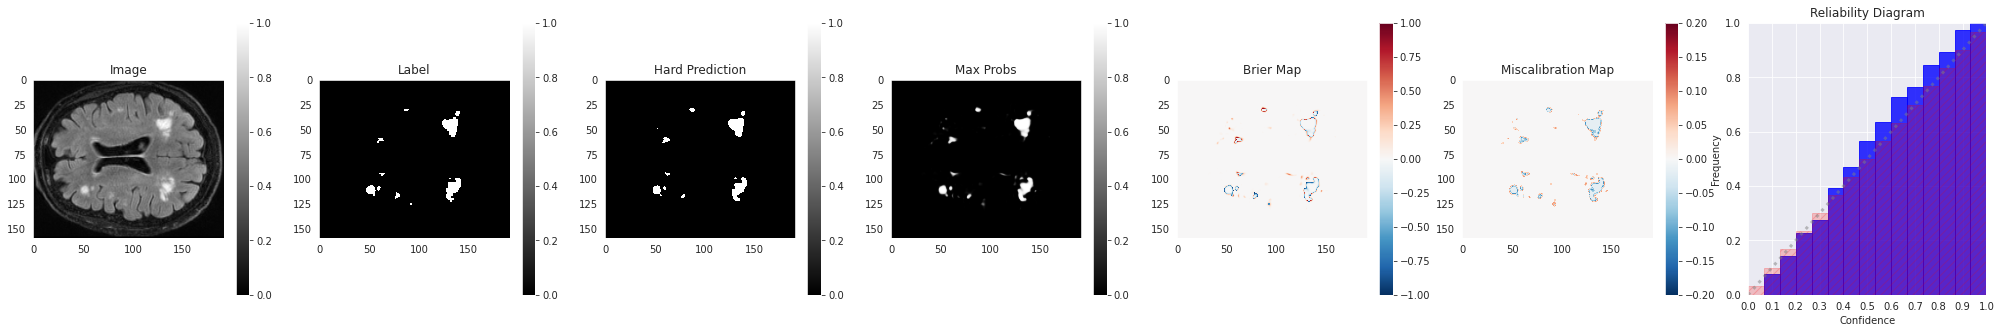

METRICS: 
--------
Dice: 0.8081725239753723
Image_ECE: 0.0003979432791026287

VOLUMES: 
--------
{'gt_volume': 5685.0,
 'hard_proportion': 0.003314208984375,
 'hard_volume': 4887.0,
 'new_gt_proportion': 0.0038553873697916665,
 'soft_proportion': 0.003824383682674832,
 'soft_volume': 5639.283203125}

METADATA: 
---------
{'batch_idx': 4,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_114',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



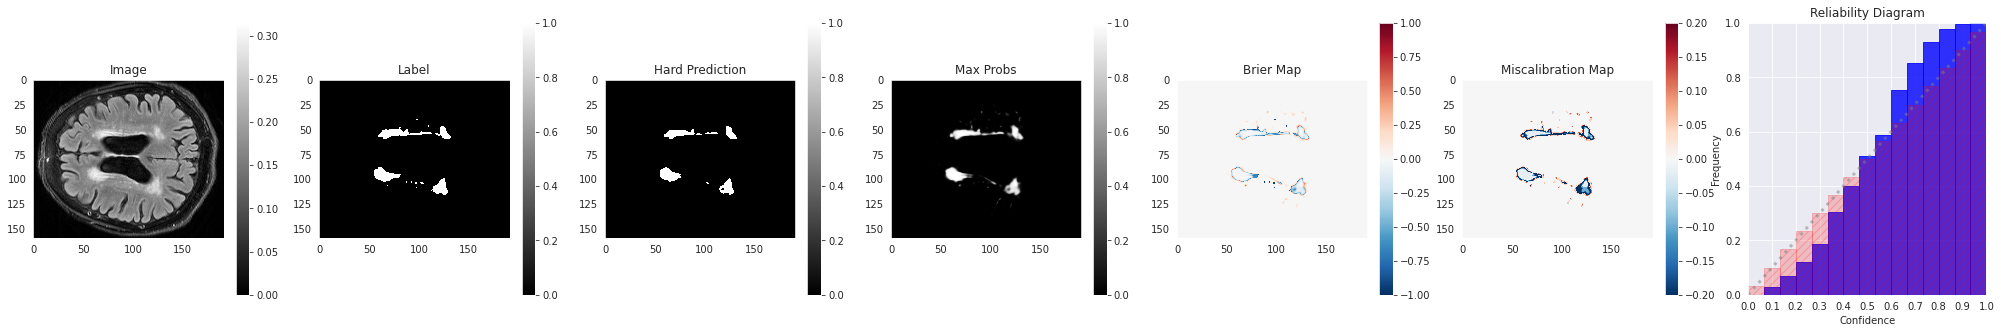

METRICS: 
--------
Dice: 0.9069027900695801
Image_ECE: 0.0006937590676183299

VOLUMES: 
--------
{'gt_volume': 6758.0,
 'hard_proportion': 0.004376898871527778,
 'hard_volume': 6454.0,
 'new_gt_proportion': 0.004583062065972222,
 'soft_proportion': 0.00470471183458964,
 'soft_volume': 6937.3798828125}

METADATA: 
---------
{'batch_idx': 4,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_87',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



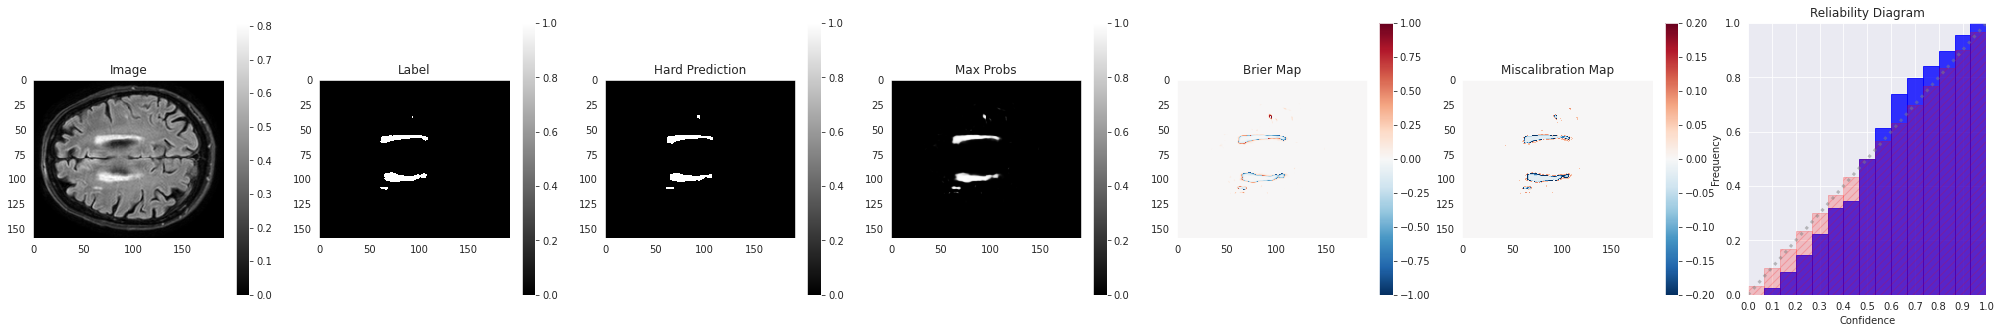

METRICS: 
--------
Dice: 0.8767926692962646
Image_ECE: 0.0003287022693524149

VOLUMES: 
--------
{'gt_volume': 3110.0,
 'hard_proportion': 0.0020521375868055554,
 'hard_volume': 3026.0,
 'new_gt_proportion': 0.002109103732638889,
 'soft_proportion': 0.002244725161128574,
 'soft_volume': 3309.98193359375}

METADATA: 
---------
{'batch_idx': 4,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_166',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



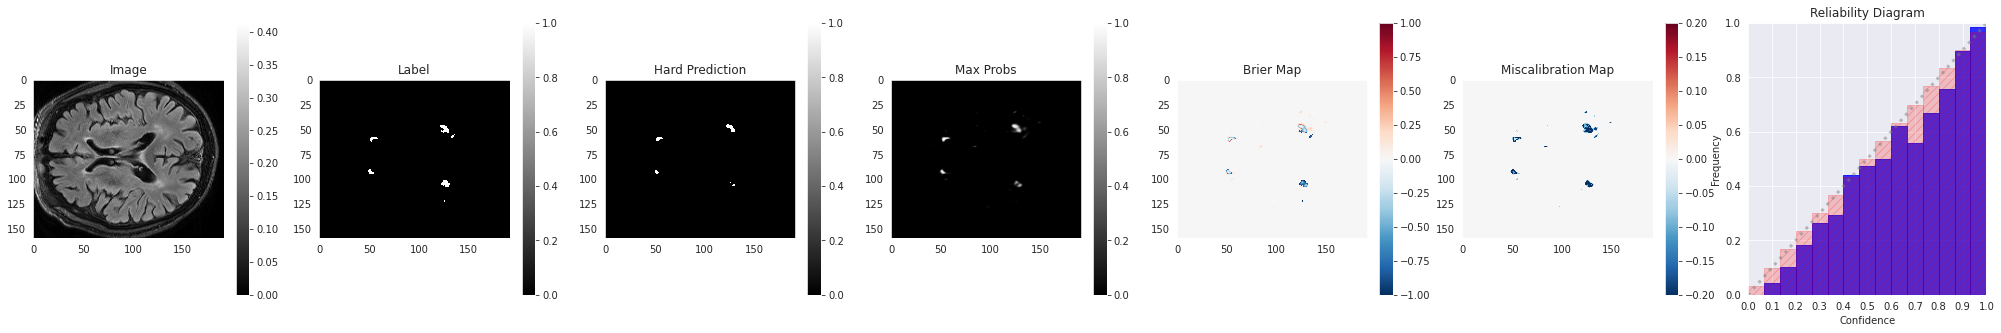

METRICS: 
--------
Dice: 0.6736035346984863
Image_ECE: 0.00019613635428195842

VOLUMES: 
--------
{'gt_volume': 965.0,
 'hard_proportion': 0.0005839029947916667,
 'hard_volume': 861.0,
 'new_gt_proportion': 0.0006544325086805555,
 'soft_proportion': 0.0008454086052046882,
 'soft_volume': 1246.605712890625}

METADATA: 
---------
{'batch_idx': 5,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_55',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



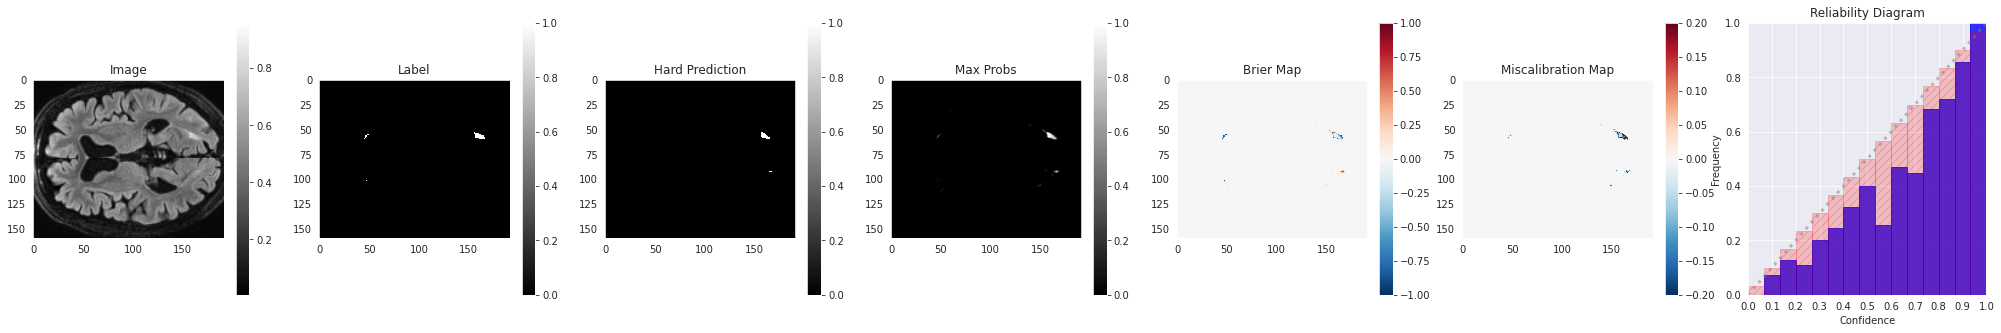

METRICS: 
--------
Dice: 0.49897751212120056
Image_ECE: 9.76508478851824e-05

VOLUMES: 
--------
{'gt_volume': 280.0,
 'hard_proportion': 0.00014173719618055557,
 'hard_volume': 209.0,
 'new_gt_proportion': 0.00018988715277777778,
 'soft_proportion': 0.00028615281399753357,
 'soft_volume': 421.9494934082031}

METADATA: 
---------
{'batch_idx': 5,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_153',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



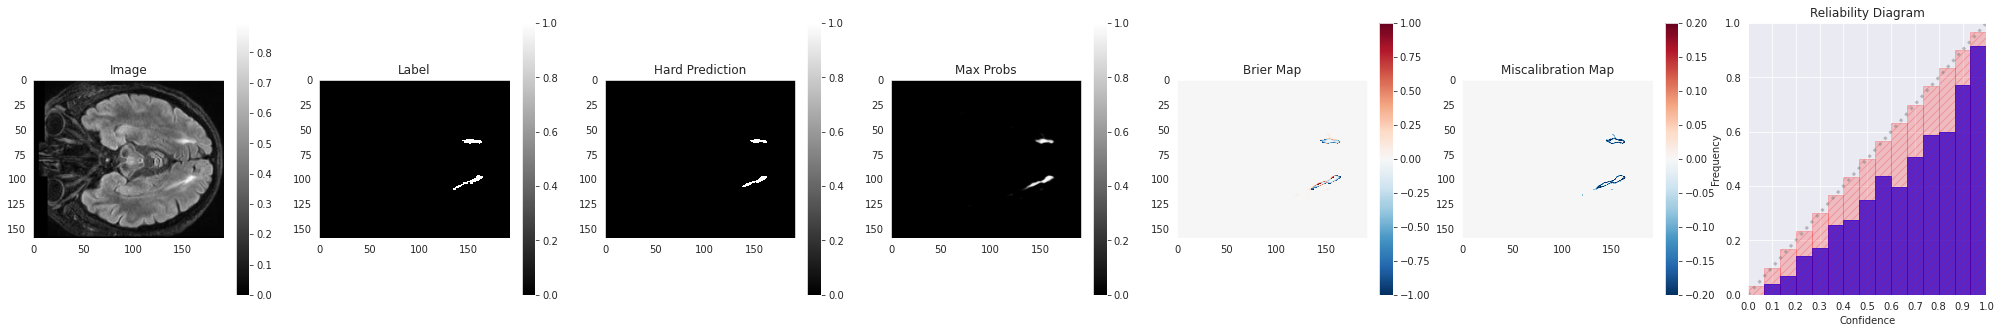

METRICS: 
--------
Dice: 0.5943083763122559
Image_ECE: 0.00028350549342106033

VOLUMES: 
--------
{'gt_volume': 738.0,
 'hard_proportion': 0.0005242241753472222,
 'hard_volume': 773.0,
 'new_gt_proportion': 0.00050048828125,
 'soft_proportion': 0.0007839938004811605,
 'soft_volume': 1156.0458984375}

METADATA: 
---------
{'batch_idx': 5,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_116',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



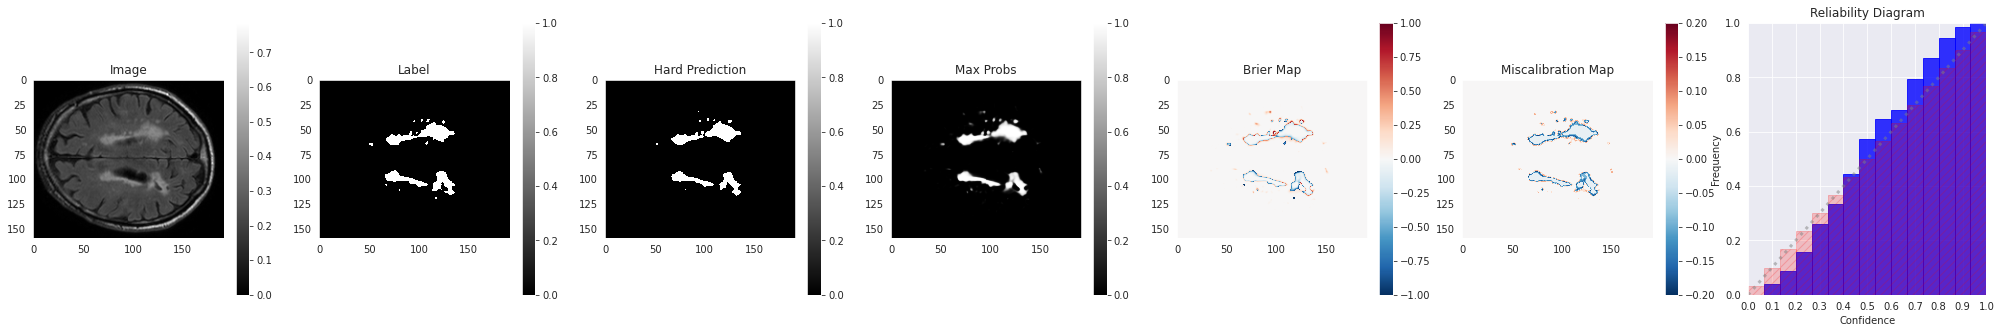

METRICS: 
--------
Dice: 0.8911749720573425
Image_ECE: 0.0008947655261651971

VOLUMES: 
--------
{'gt_volume': 11163.0,
 'hard_proportion': 0.007130262586805556,
 'hard_volume': 10514.0,
 'new_gt_proportion': 0.007570393880208333,
 'soft_proportion': 0.007696384191513061,
 'soft_volume': 11348.7802734375}

METADATA: 
---------
{'batch_idx': 5,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_41',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



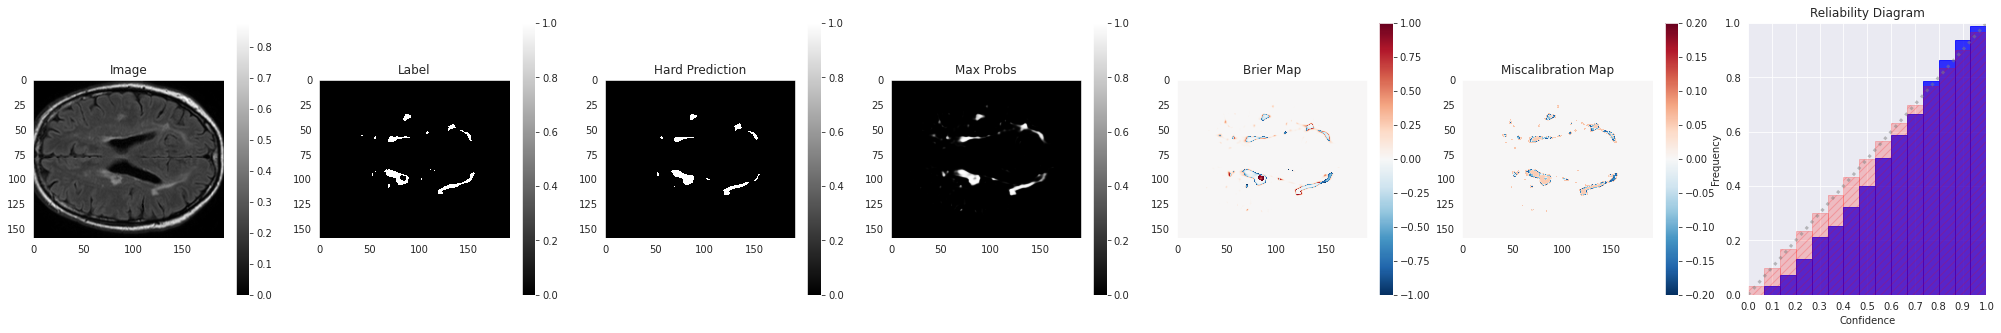

METRICS: 
--------
Dice: 0.7984246611595154
Image_ECE: 0.0007643411488531746

VOLUMES: 
--------
{'gt_volume': 4316.0,
 'hard_proportion': 0.002755398220486111,
 'hard_volume': 4063.0,
 'new_gt_proportion': 0.002926974826388889,
 'soft_proportion': 0.003620866272184584,
 'soft_volume': 5339.1845703125}

METADATA: 
---------
{'batch_idx': 6,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_16',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



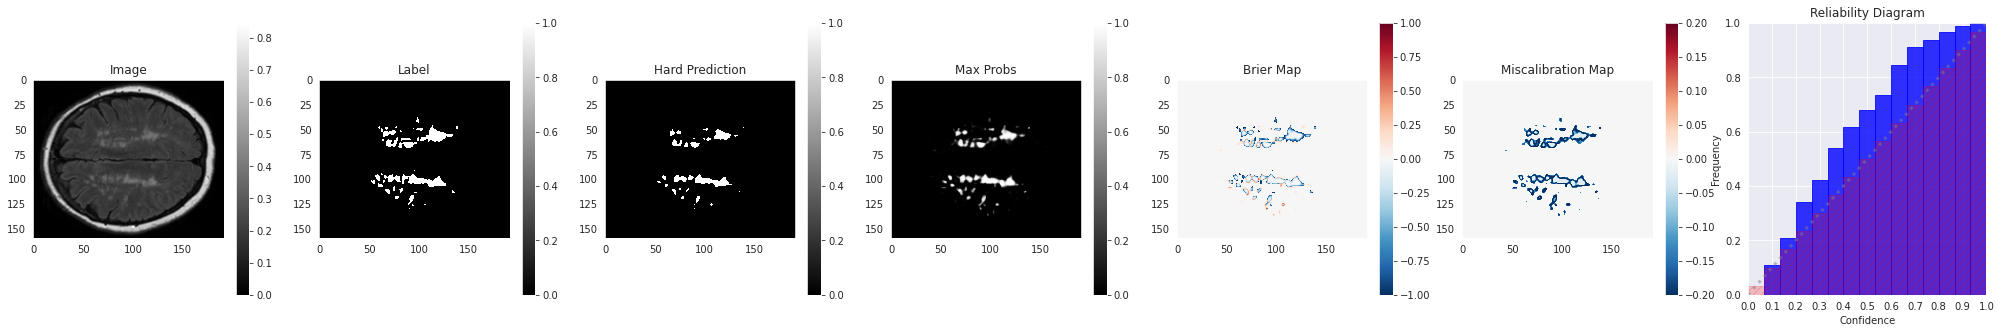

METRICS: 
--------
Dice: 0.7830164432525635
Image_ECE: 0.0009783391312671909

VOLUMES: 
--------
{'gt_volume': 9026.0,
 'hard_proportion': 0.004436577690972222,
 'hard_volume': 6542.0,
 'new_gt_proportion': 0.006121148003472222,
 'soft_proportion': 0.005142808953921,
 'soft_volume': 7583.38037109375}

METADATA: 
---------
{'batch_idx': 6,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_49',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



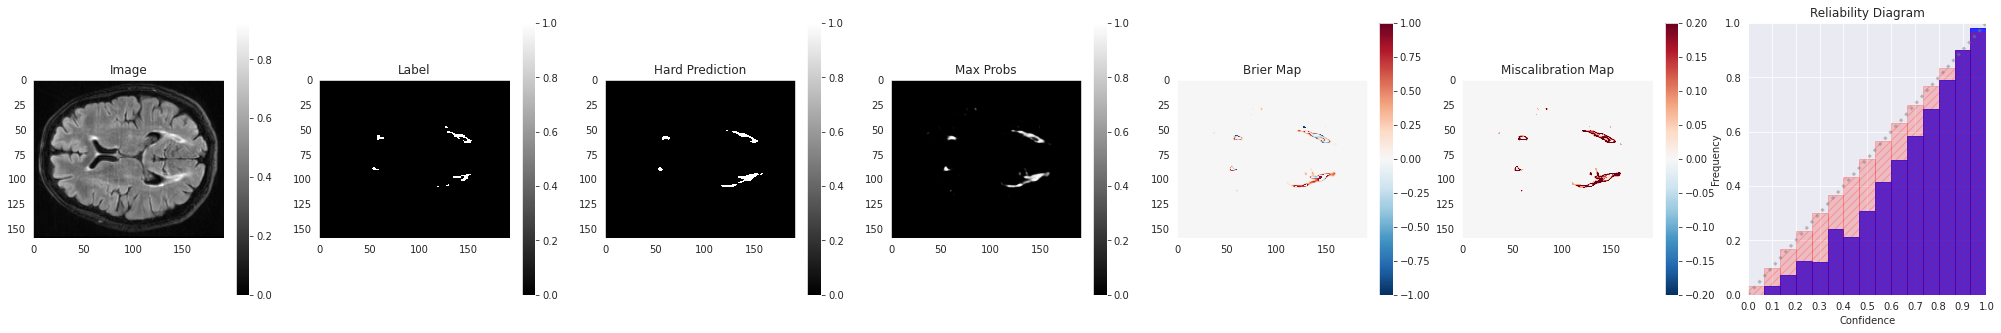

METRICS: 
--------
Dice: 0.7260024547576904
Image_ECE: 0.0004360502541848257

VOLUMES: 
--------
{'gt_volume': 1580.0,
 'hard_proportion': 0.0011610243055555556,
 'hard_volume': 1712.0,
 'new_gt_proportion': 0.001071506076388889,
 'soft_proportion': 0.0015012900034586589,
 'soft_volume': 2213.7421875}

METADATA: 
---------
{'batch_idx': 6,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_131',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



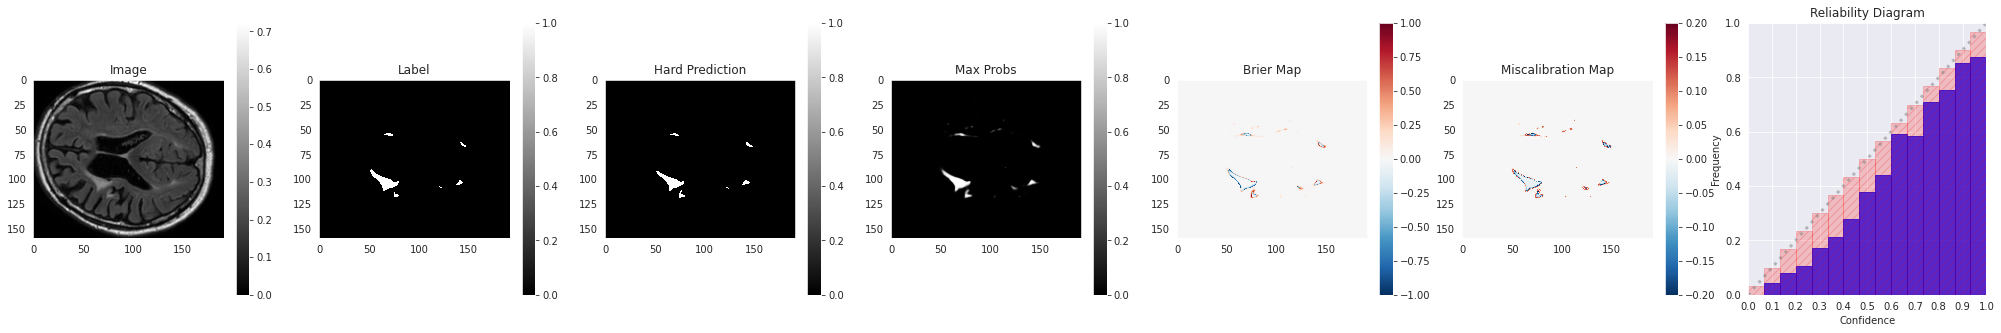

METRICS: 
--------
Dice: 0.7692015767097473
Image_ECE: 0.0005248157159915484

VOLUMES: 
--------
{'gt_volume': 2539.0,
 'hard_proportion': 0.0018541124131944444,
 'hard_volume': 2734.0,
 'new_gt_proportion': 0.0017218695746527778,
 'soft_proportion': 0.002246685160530938,
 'soft_volume': 3312.8720703125}

METADATA: 
---------
{'batch_idx': 6,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_15',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



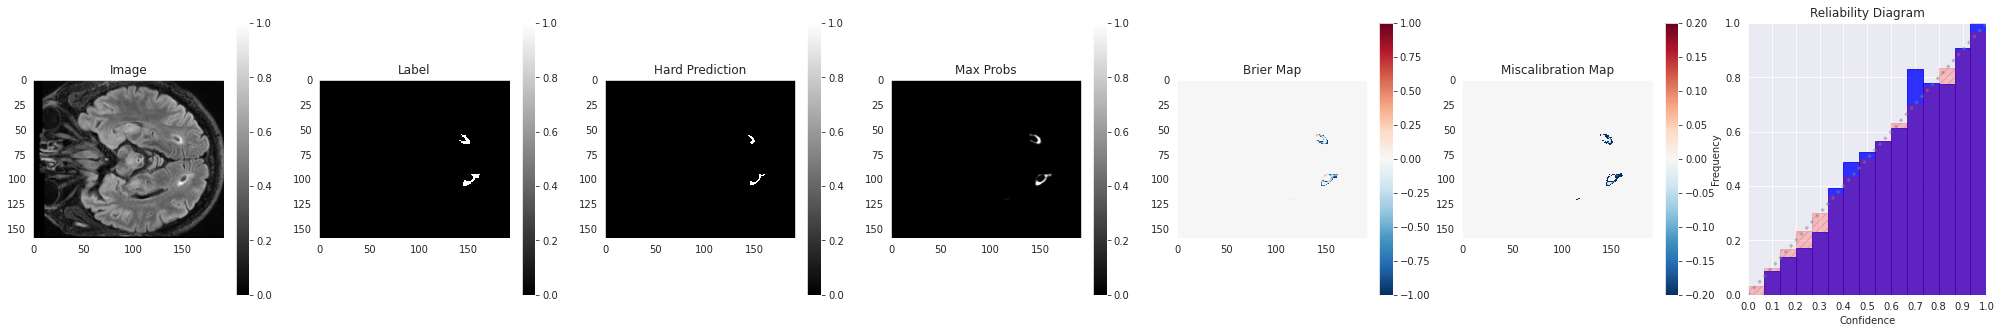

METRICS: 
--------
Dice: 0.5942790508270264
Image_ECE: 0.00011719415149668552

VOLUMES: 
--------
{'gt_volume': 1041.0,
 'hard_proportion': 0.0004557291666666667,
 'hard_volume': 672.0,
 'new_gt_proportion': 0.0007059733072916667,
 'soft_proportion': 0.0007809961835543315,
 'soft_volume': 1151.625732421875}

METADATA: 
---------
{'batch_idx': 7,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_101',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



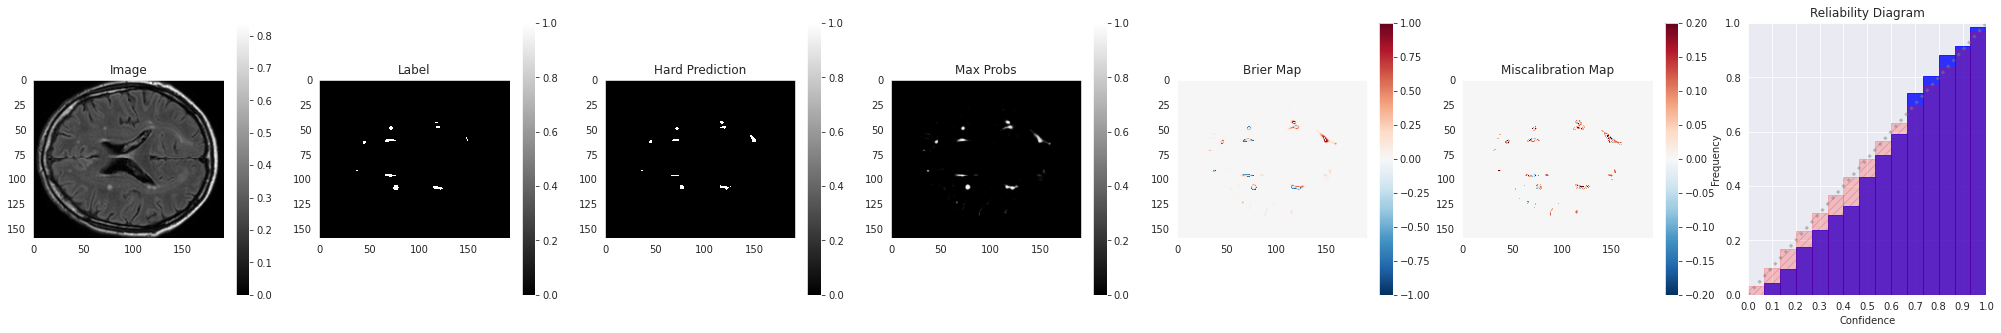

METRICS: 
--------
Dice: 0.6427145600318909
Image_ECE: 0.0002814365761534333

VOLUMES: 
--------
{'gt_volume': 1452.0,
 'hard_proportion': 0.000714111328125,
 'hard_volume': 1053.0,
 'new_gt_proportion': 0.0009847005208333333,
 'soft_proportion': 0.0012342267566257054,
 'soft_volume': 1819.94140625}

METADATA: 
---------
{'batch_idx': 7,
 'data_cfg_str': 'split:cal',
 'data_id': 'Utrecht_38',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



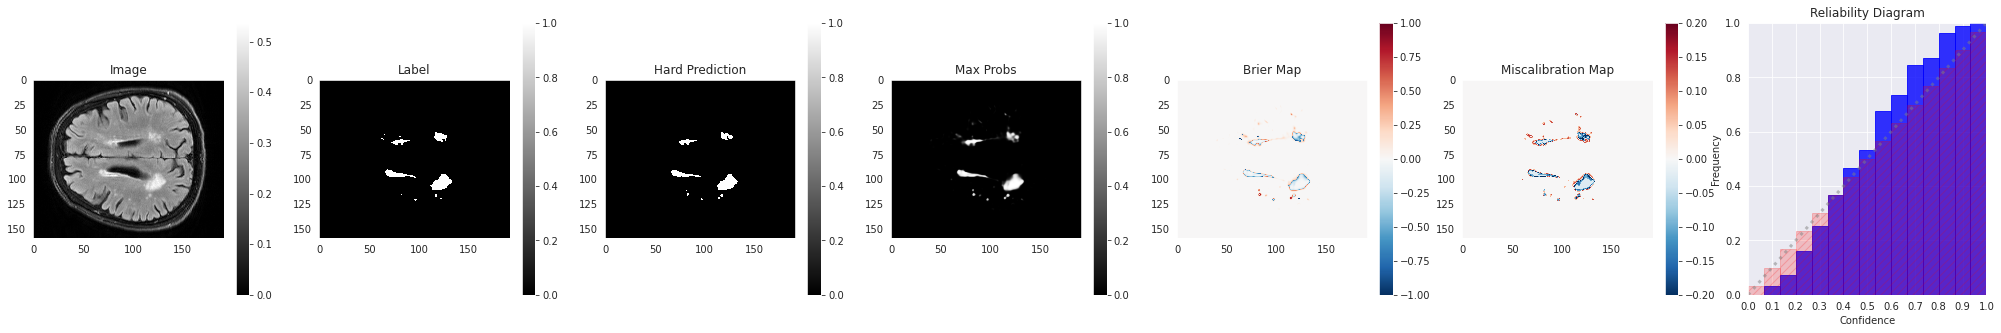

METRICS: 
--------
Dice: 0.8731067776679993
Image_ECE: 0.0004497547026446083

VOLUMES: 
--------
{'gt_volume': 4101.0,
 'hard_proportion': 0.0025472005208333334,
 'hard_volume': 3756.0,
 'new_gt_proportion': 0.002781168619791667,
 'soft_proportion': 0.0028495997190475463,
 'soft_volume': 4201.90576171875}

METADATA: 
---------
{'batch_idx': 7,
 'data_cfg_str': 'split:cal',
 'data_id': 'Singapore_82',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



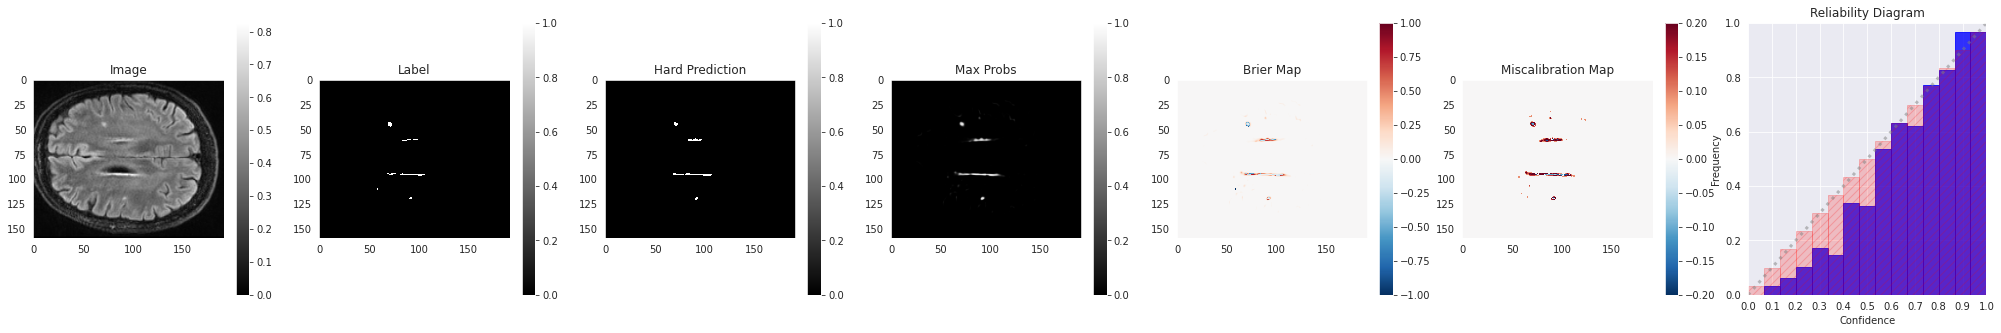

METRICS: 
--------
Dice: 0.6284201145172119
Image_ECE: 0.0002701806189678614

VOLUMES: 
--------
{'gt_volume': 608.0,
 'hard_proportion': 0.0003560384114583333,
 'hard_volume': 525.0,
 'new_gt_proportion': 0.0004123263888888889,
 'soft_proportion': 0.0006756715890434053,
 'soft_volume': 996.3182983398438}

METADATA: 
---------
{'batch_idx': 7,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_138',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



W1029 21:39:25.254769 140311704733504 torch/_dynamo/variables/builtin.py:775] [0/1] incorrect arg count <bound method BuiltinVariable.call_enumerate of BuiltinVariable()> got an unexpected keyword argument 'start' and no constant handler


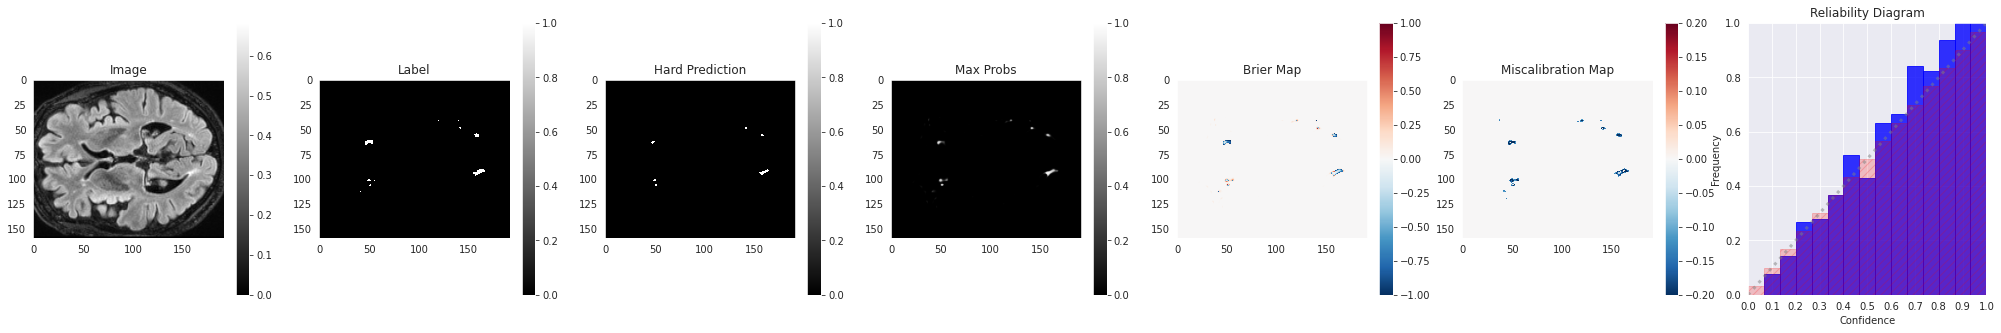

METRICS: 
--------
Dice: 0.5543369650840759
Image_ECE: 9.117052720984748e-05

VOLUMES: 
--------
{'gt_volume': 654.0,
 'hard_proportion': 0.00023668077256944444,
 'hard_volume': 349.0,
 'new_gt_proportion': 0.00044352213541666666,
 'soft_proportion': 0.00048421588208940296,
 'soft_volume': 714.00537109375}

METADATA: 
---------
{'batch_idx': 8,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_109',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



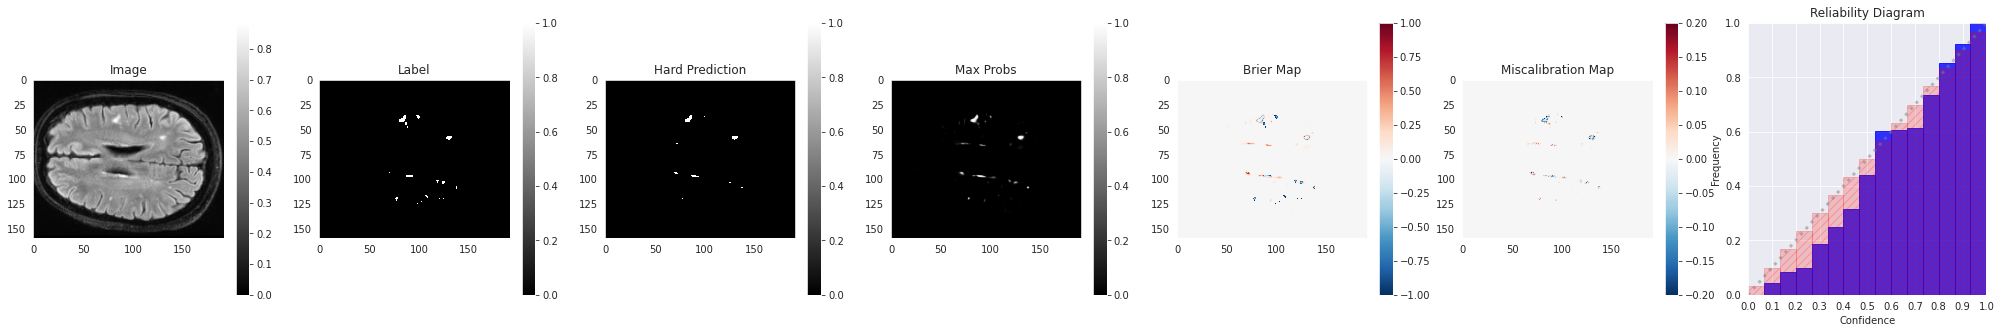

METRICS: 
--------
Dice: 0.607225239276886
Image_ECE: 0.00016255635424924073

VOLUMES: 
--------
{'gt_volume': 744.0,
 'hard_proportion': 0.00037773980034722224,
 'hard_volume': 557.0,
 'new_gt_proportion': 0.0005045572916666667,
 'soft_proportion': 0.000656456169154909,
 'soft_volume': 967.9840087890625}

METADATA: 
---------
{'batch_idx': 8,
 'data_cfg_str': 'split:cal',
 'data_id': 'Amsterdam_144',
 'from_logits': True,
 'split': 'cal',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



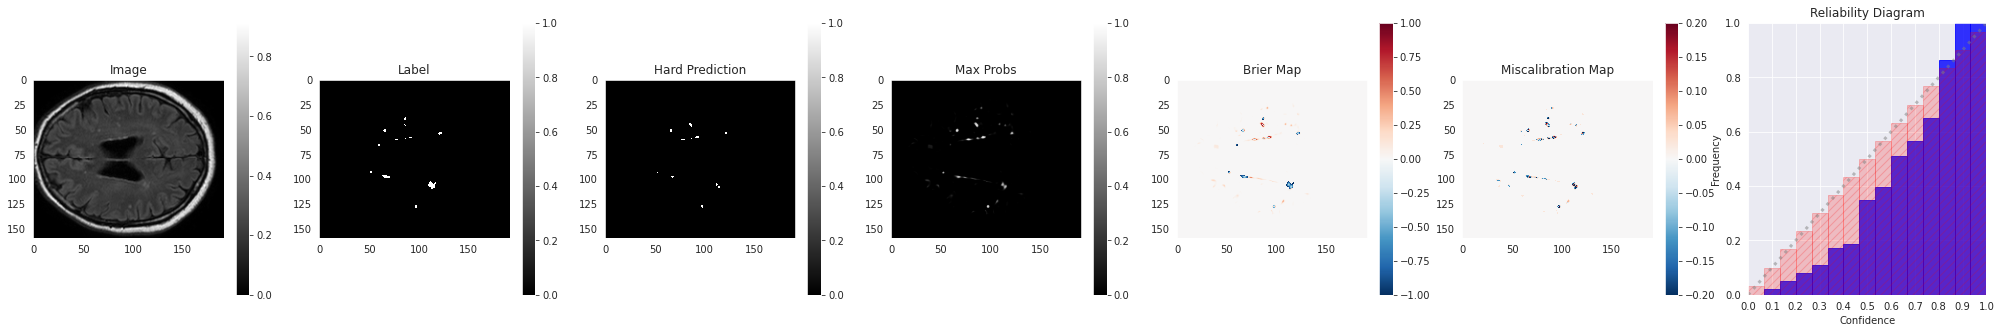

METRICS: 
--------
Dice: 0.5107344388961792
Image_ECE: 0.0003424877030146019

VOLUMES: 
--------
{'gt_volume': 509.0,
 'hard_proportion': 0.00025499131944444446,
 'hard_volume': 376.0,
 'new_gt_proportion': 0.0003451877170138889,
 'soft_proportion': 0.0006800561315483517,
 'soft_volume': 1002.7835693359375}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_8',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



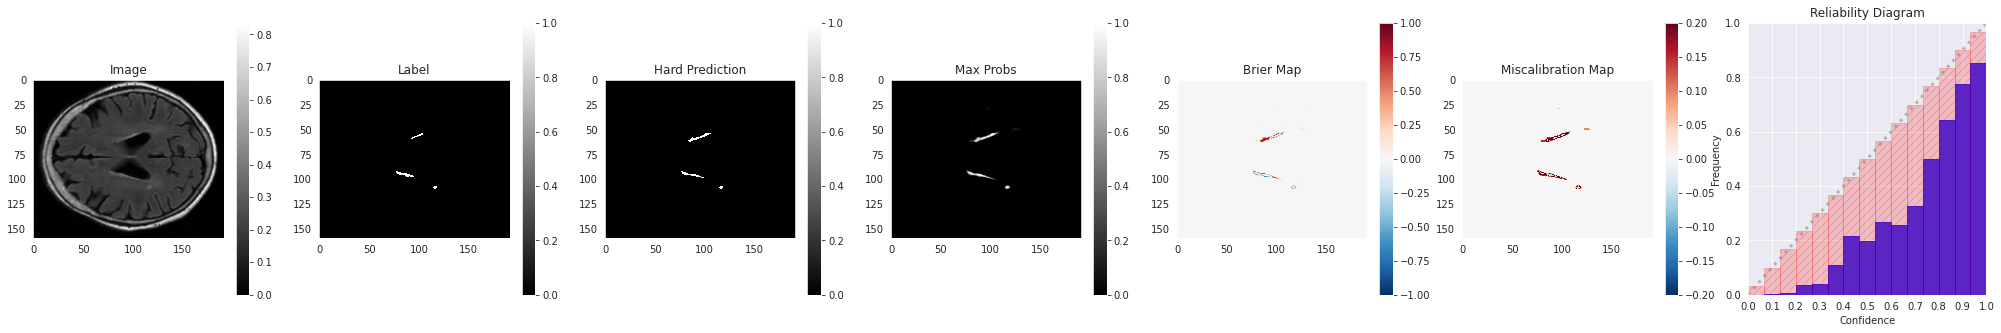

METRICS: 
--------
Dice: 0.614973247051239
Image_ECE: 0.00034432458639920905

VOLUMES: 
--------
{'gt_volume': 292.0,
 'hard_proportion': 0.00030924479166666665,
 'hard_volume': 456.0,
 'new_gt_proportion': 0.0001980251736111111,
 'soft_proportion': 0.0005423497408628464,
 'soft_volume': 799.7272338867188}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_27',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



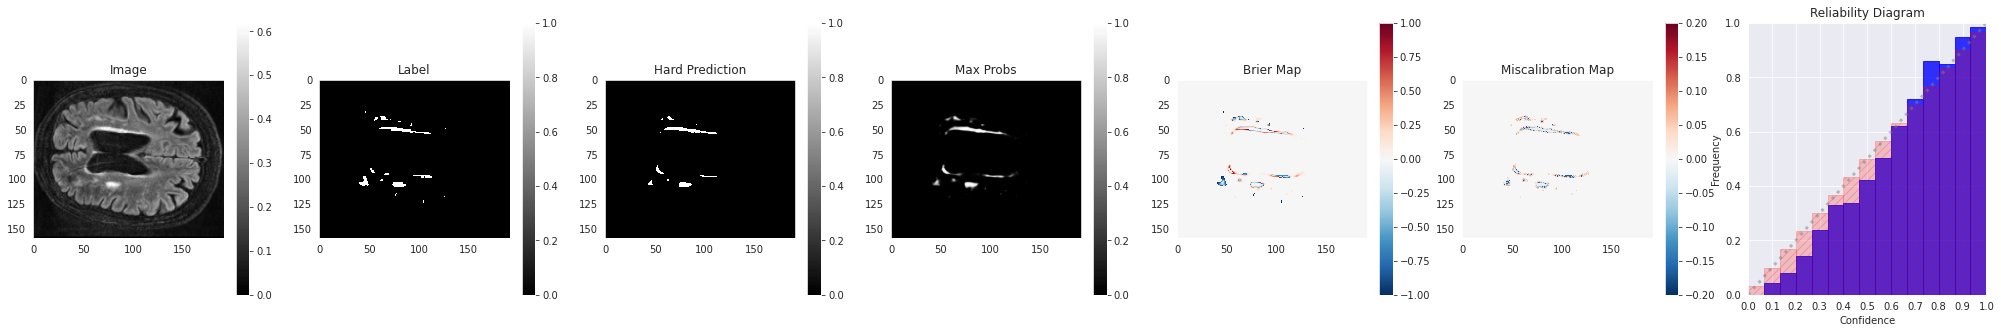

METRICS: 
--------
Dice: 0.702678382396698
Image_ECE: 0.0003003435357728947

VOLUMES: 
--------
{'gt_volume': 2389.0,
 'hard_proportion': 0.0013929578993055556,
 'hard_volume': 2054.0,
 'new_gt_proportion': 0.001620144314236111,
 'soft_proportion': 0.0018450837996270922,
 'soft_volume': 2720.686767578125}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_146',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



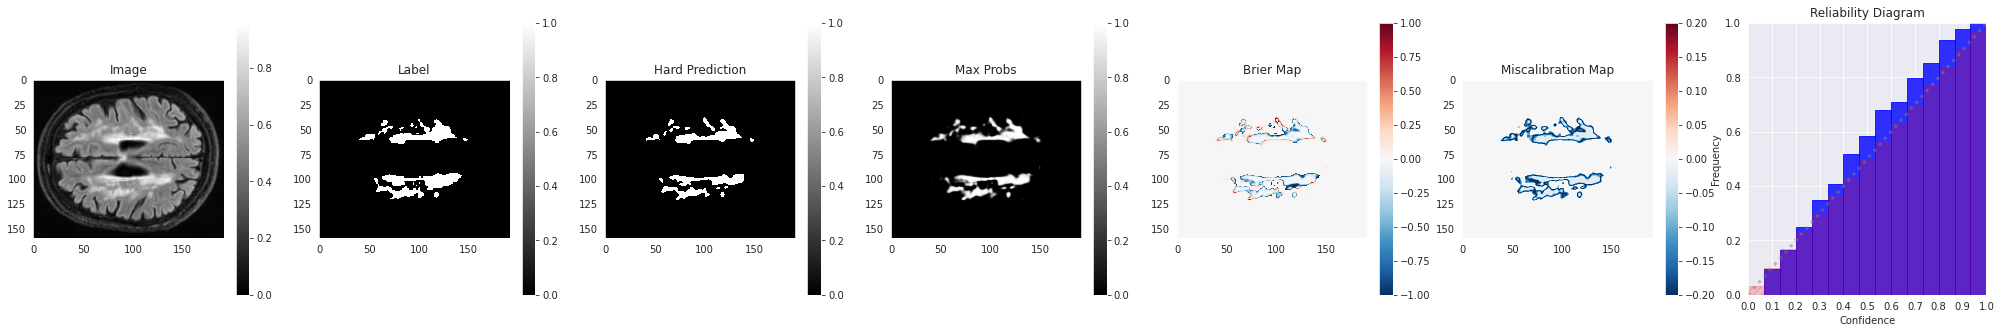

METRICS: 
--------
Dice: 0.8431776165962219
Image_ECE: 0.0008212726200252677

VOLUMES: 
--------
{'gt_volume': 15526.0,
 'hard_proportion': 0.009242078993055555,
 'hard_volume': 13628.0,
 'new_gt_proportion': 0.010529242621527778,
 'soft_proportion': 0.009820725520451863,
 'soft_volume': 14481.2490234375}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_117',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



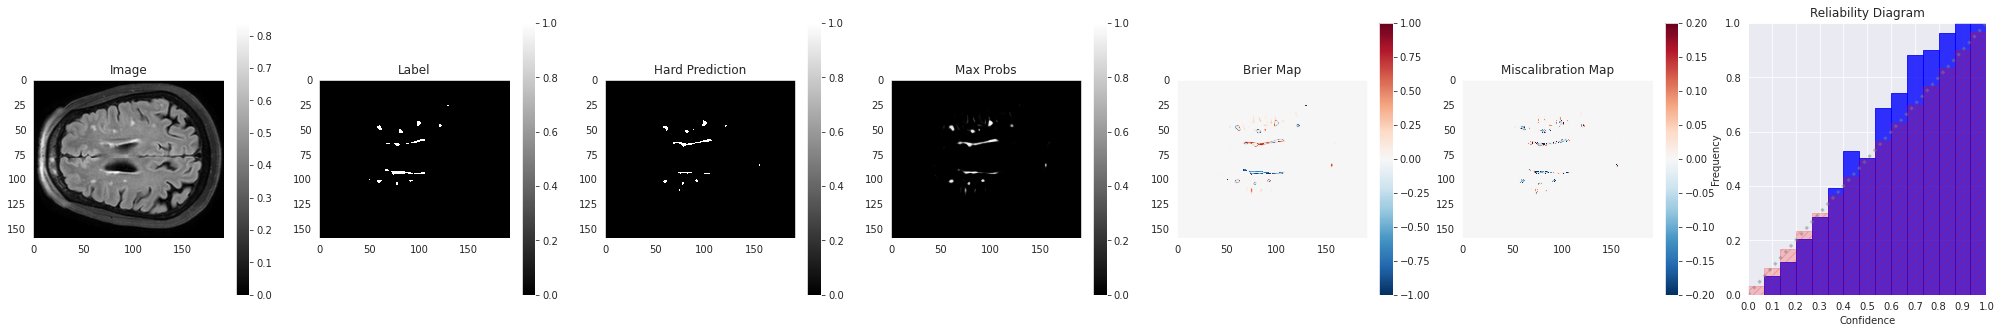

METRICS: 
--------
Dice: 0.6609012484550476
Image_ECE: 0.000133881918079475

VOLUMES: 
--------
{'gt_volume': 1352.0,
 'hard_proportion': 0.0005730523003472222,
 'hard_volume': 845.0,
 'new_gt_proportion': 0.0009168836805555556,
 'soft_proportion': 0.0009003080427646637,
 'soft_volume': 1327.5582275390625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_165',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



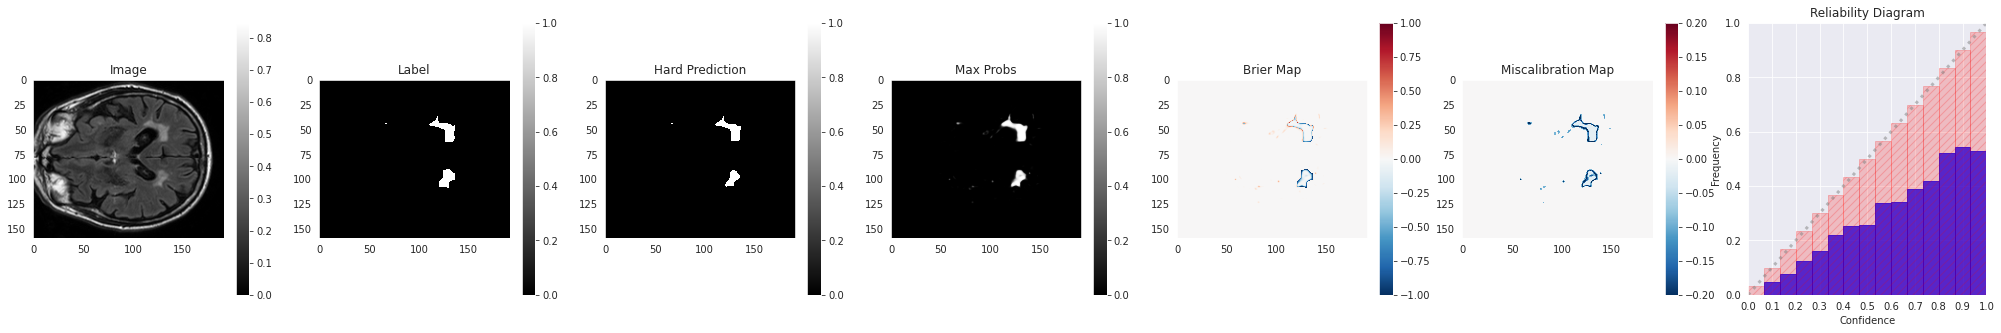

METRICS: 
--------
Dice: 0.5856763124465942
Image_ECE: 0.002218543873561604

VOLUMES: 
--------
{'gt_volume': 4028.0,
 'hard_proportion': 0.004408094618055556,
 'hard_volume': 6500.0,
 'new_gt_proportion': 0.0027316623263888887,
 'soft_proportion': 0.004950206147299872,
 'soft_volume': 7299.3759765625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_19',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



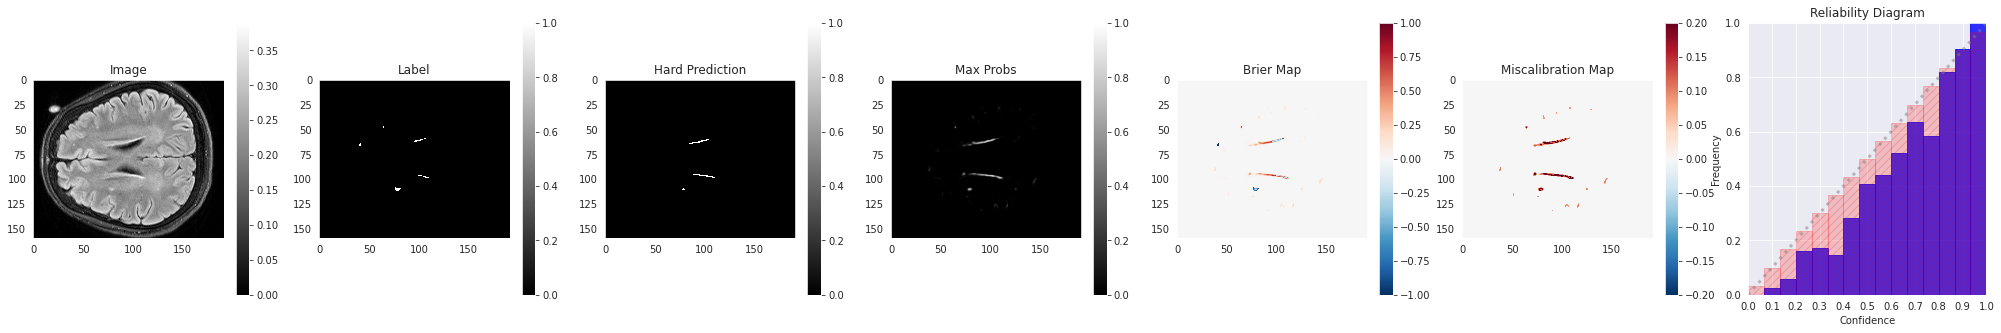

METRICS: 
--------
Dice: 0.5075987577438354
Image_ECE: 0.00023423149006949136

VOLUMES: 
--------
{'gt_volume': 381.0,
 'hard_proportion': 0.00018785264756944445,
 'hard_volume': 277.0,
 'new_gt_proportion': 0.00025838216145833334,
 'soft_proportion': 0.0004920590254995558,
 'soft_volume': 725.570556640625}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:val',
 'data_id': 'Singapore_53',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



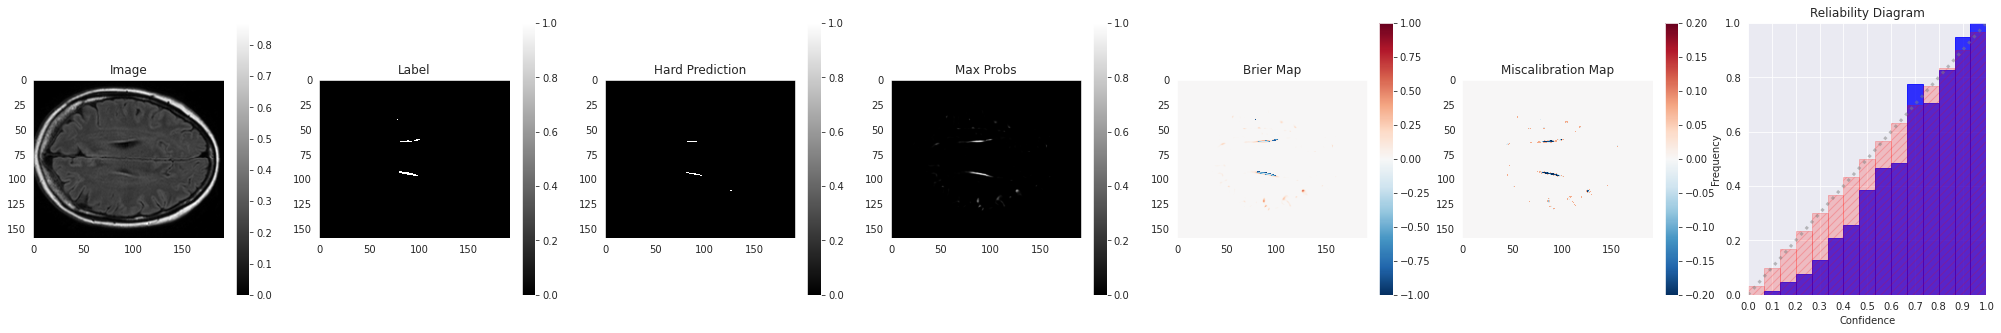

METRICS: 
--------
Dice: 0.5501113533973694
Image_ECE: 0.0004037078535134577

VOLUMES: 
--------
{'gt_volume': 521.0,
 'hard_proportion': 0.00025566948784722224,
 'hard_volume': 377.0,
 'new_gt_proportion': 0.0003533257378472222,
 'soft_proportion': 0.0007482827537589603,
 'soft_volume': 1103.3878173828125}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_12',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



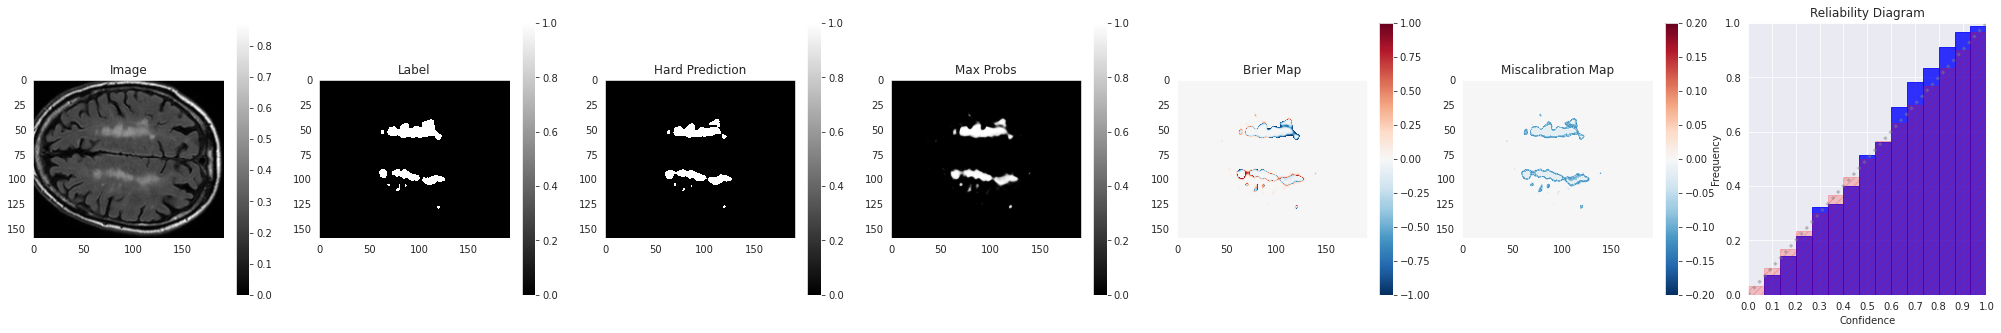

METRICS: 
--------
Dice: 0.8449013233184814
Image_ECE: 0.00036809633431878353

VOLUMES: 
--------
{'gt_volume': 8187.0,
 'hard_proportion': 0.0050686306423611115,
 'hard_volume': 7474.0,
 'new_gt_proportion': 0.005552164713541667,
 'soft_proportion': 0.005527997679180569,
 'soft_volume': 8151.3642578125}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_25',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



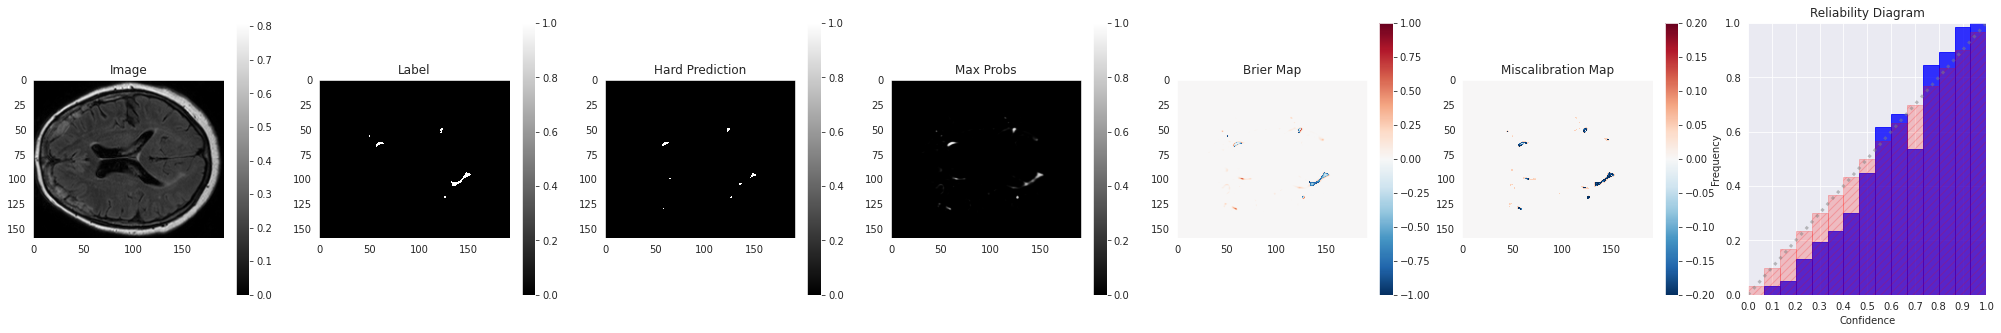

METRICS: 
--------
Dice: 0.66300368309021
Image_ECE: 0.00021304004005966734

VOLUMES: 
--------
{'gt_volume': 612.0,
 'hard_proportion': 0.0003255208333333333,
 'hard_volume': 480.0,
 'new_gt_proportion': 0.0004150390625,
 'soft_proportion': 0.0005958416395717198,
 'soft_volume': 878.604248046875}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_36',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



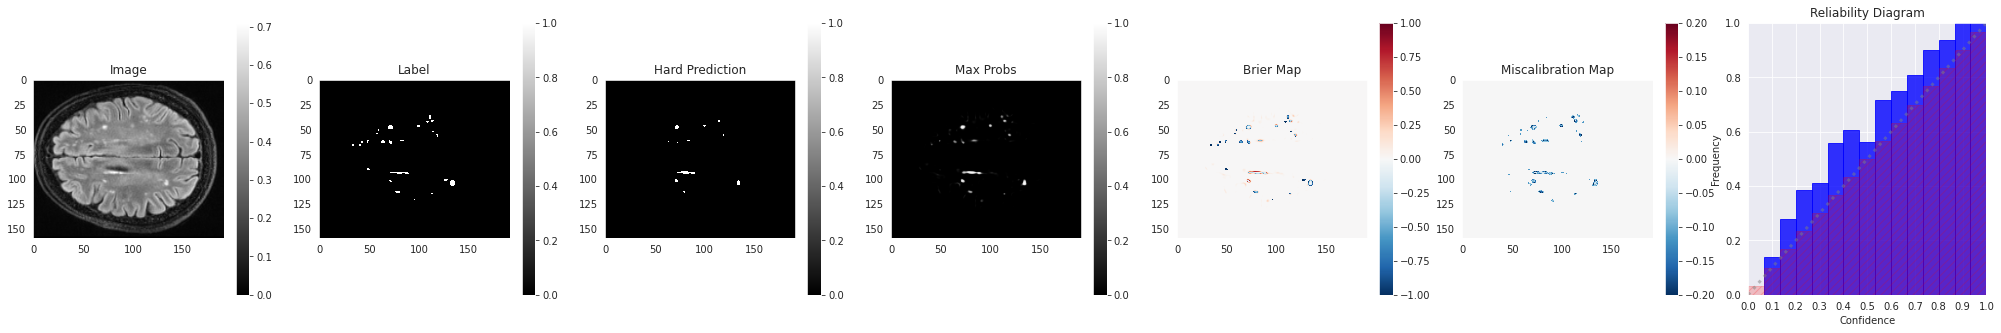

METRICS: 
--------
Dice: 0.49412915110588074
Image_ECE: 0.00027380557719374913

VOLUMES: 
--------
{'gt_volume': 1440.0,
 'hard_proportion': 0.0004096137152777778,
 'hard_volume': 604.0,
 'new_gt_proportion': 0.0009765625,
 'soft_proportion': 0.0007027568916479747,
 'soft_volume': 1036.2572021484375}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_102',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



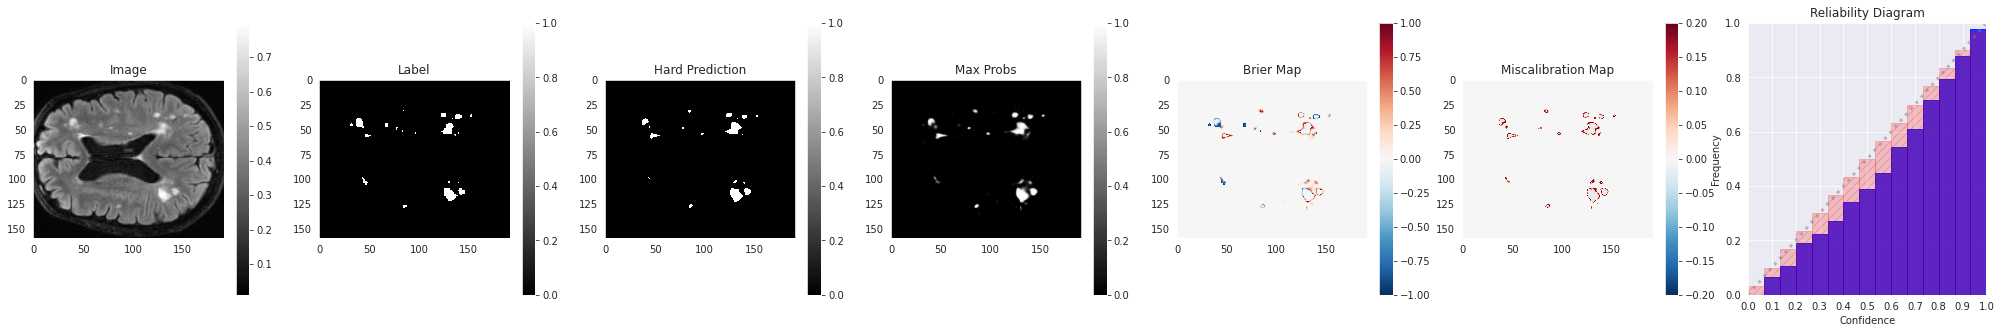

METRICS: 
--------
Dice: 0.7735733985900879
Image_ECE: 0.0006250213017949032

VOLUMES: 
--------
{'gt_volume': 6551.0,
 'hard_proportion': 0.004446750217013889,
 'hard_volume': 6557.0,
 'new_gt_proportion': 0.004442681206597222,
 'soft_proportion': 0.0050618284278445775,
 'soft_volume': 7463.9697265625}

METADATA: 
---------
{'batch_idx': 2,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_155',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



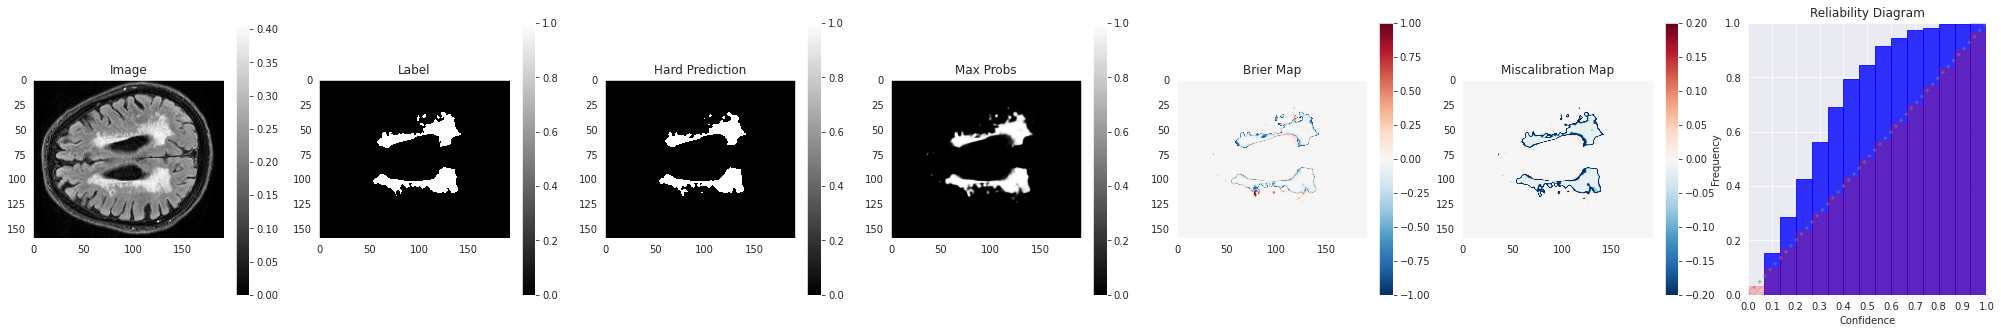

METRICS: 
--------
Dice: 0.8798069357872009
Image_ECE: 0.0022277752469865102

VOLUMES: 
--------
{'gt_volume': 20444.0,
 'hard_proportion': 0.011142306857638888,
 'hard_volume': 16430.0,
 'new_gt_proportion': 0.01386447482638889,
 'soft_proportion': 0.01163669957054986,
 'soft_volume': 17159.01171875}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:val',
 'data_id': 'Singapore_62',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



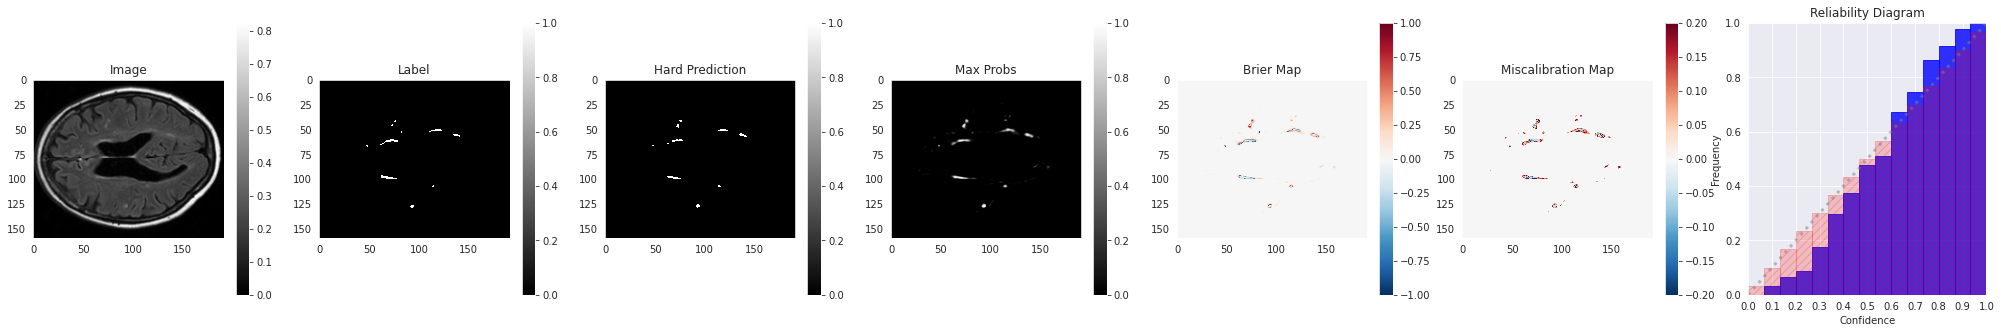

METRICS: 
--------
Dice: 0.7547169923782349
Image_ECE: 0.00034084973717021956

VOLUMES: 
--------
{'gt_volume': 1345.0,
 'hard_proportion': 0.0007771809895833333,
 'hard_volume': 1146.0,
 'new_gt_proportion': 0.0009121365017361111,
 'soft_proportion': 0.0011785071757104662,
 'soft_volume': 1737.779541015625}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_33',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



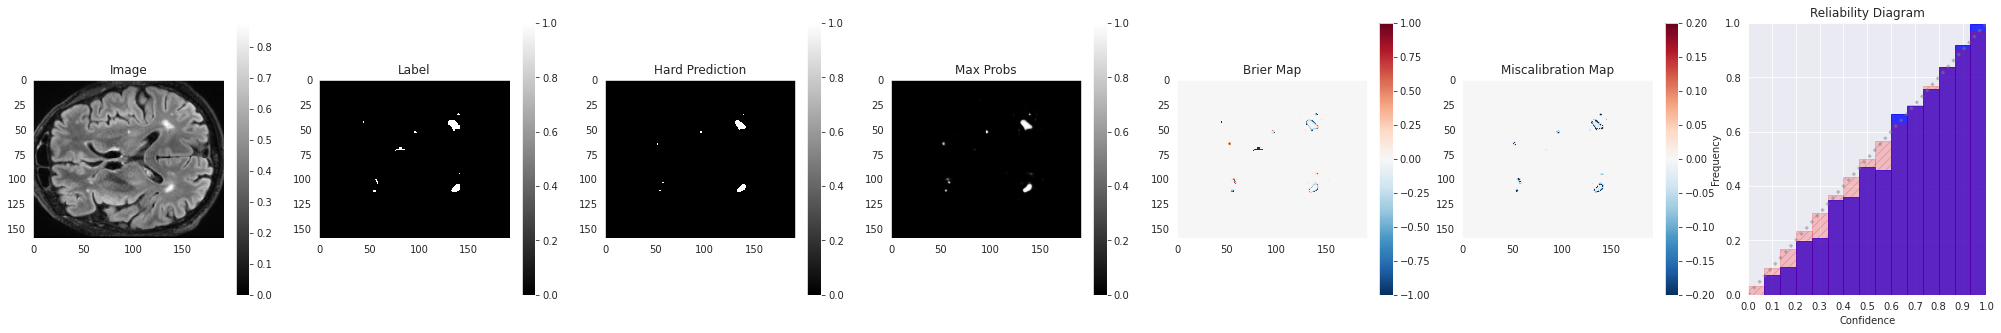

METRICS: 
--------
Dice: 0.6965669989585876
Image_ECE: 0.00011599740866875237

VOLUMES: 
--------
{'gt_volume': 1005.0,
 'hard_proportion': 0.000543212890625,
 'hard_volume': 801.0,
 'new_gt_proportion': 0.0006815592447916666,
 'soft_proportion': 0.0007846737073527442,
 'soft_volume': 1157.0484619140625}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_110',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



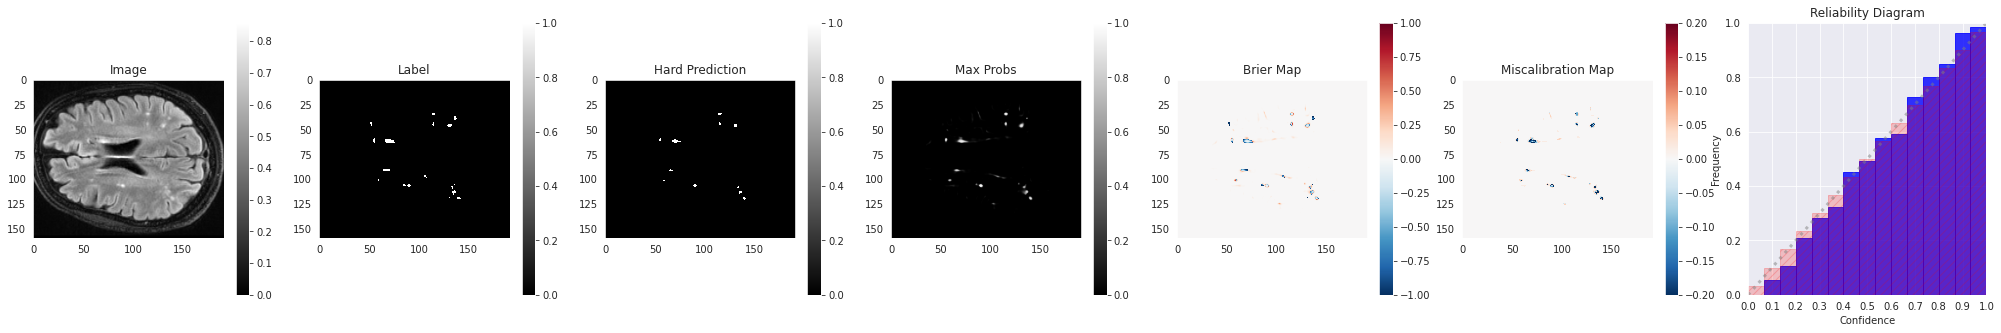

W1029 21:41:10.009877 140311704733504 torch/_dynamo/variables/builtin.py:775] [0/2] incorrect arg count <bound method BuiltinVariable.call_enumerate of BuiltinVariable()> got an unexpected keyword argument 'start' and no constant handler


METRICS: 
--------
Dice: 0.6785897016525269
Image_ECE: 0.00014505943040322102

VOLUMES: 
--------
{'gt_volume': 1109.0,
 'hard_proportion': 0.0005750868055555556,
 'hard_volume': 848.0,
 'new_gt_proportion': 0.0007520887586805556,
 'soft_proportion': 0.0008644926879141066,
 'soft_volume': 1274.746337890625}

METADATA: 
---------
{'batch_idx': 3,
 'data_cfg_str': 'split:val',
 'data_id': 'Amsterdam_139',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



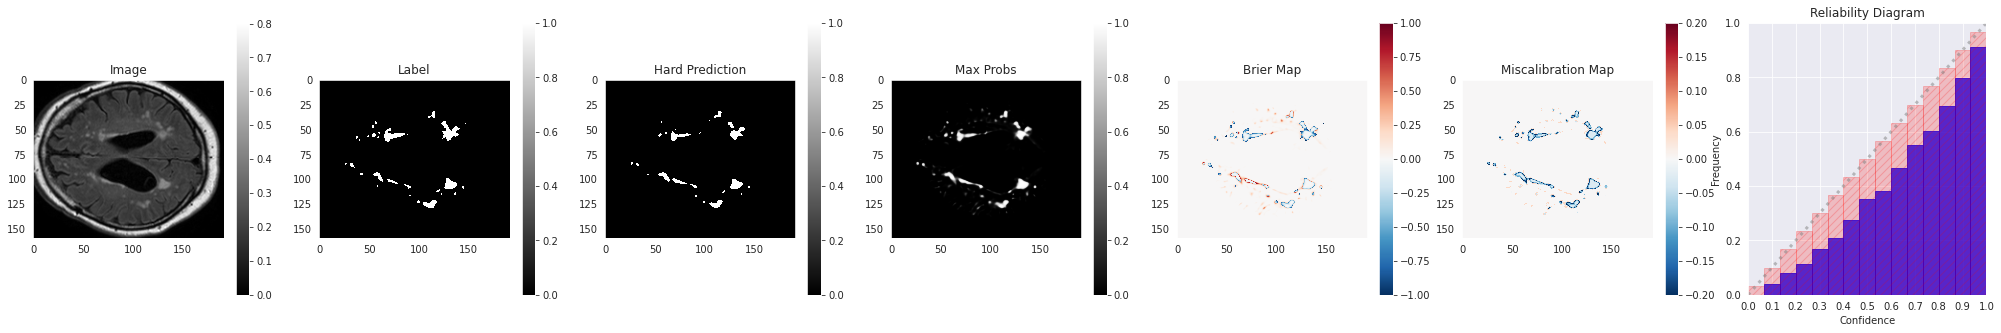

METRICS: 
--------
Dice: 0.7246617078781128
Image_ECE: 0.0018611720421255547

VOLUMES: 
--------
{'gt_volume': 7339.0,
 'hard_proportion': 0.0056484646267361115,
 'hard_volume': 8329.0,
 'new_gt_proportion': 0.0049770779079861115,
 'soft_proportion': 0.006838250160217285,
 'soft_volume': 10083.41015625}

METADATA: 
---------
{'batch_idx': 4,
 'data_cfg_str': 'split:val',
 'data_id': 'Utrecht_47',
 'from_logits': True,
 'split': 'val',
 'temperature': 1.0,
 'threshold': 0.5}
--------------------------------------------------------------------------



In [10]:
from ese.experiment import run_ese_exp

###### Run individual jobs
run_ese_exp(
    config=inf_cfgs[0], 
    job_func=get_cal_stats,
    run_name='debug',
    show_examples=True,
    gpu='0',
)

In [11]:
# from ese.experiment import submit_ese_exps 

# #### Run Batch Jobs
# submit_ese_exps(
#     group="inference",
#     base_cfg=updated_base_cfg,
#     add_date=add_date,
#     exp_cfg=experiment_cfg,
#     config_list=inf_cfgs,
#     job_func=get_cal_stats,
#     # available_gpus=['0', '1', '2', '3']
#     available_gpus=['4', '5'],
#     # available_gpus=['6', '7'],
#     # available_gpus=['4', '5', '6', '7']
# )